# FIRST TRY

## Download database tgz

In [ ]:
!wget -q https://krono.act.uji.es/IDIA/rent-a-bike.tgz

## Unzip tgz archive

In [ ]:
import tarfile

# Descomprimir el archivo TGZ
with tarfile.open('./rent-a-bike.tgz', 'r:gz') as tar:
    tar.extractall('./')

In [ ]:
!ls rent-a-bike

anchors.csv	     benches.csv		incident_errors.csv	  loans.csv
bans.csv	     benches_notifications.csv	incident_historicals.csv  putbacks.csv
bans_reasons.csv     bench_messages.csv		incidents.csv		  users.csv
benches_anchors.csv  bicycles.csv		loan_historical.csv


## Extract necessary data and transform it

In [ ]:
import pandas as pd
putbacks = pd.read_csv("rent-a-bike/putbacks.csv")
benches = pd.read_csv("rent-a-bike/benches_anchors.csv")

putbacks_columns = ["anchor_uuid", "date_created"]
benches_columns = ["anchor_uuid", "bench_uuid"]

putbacks_benches = pd.merge(putbacks[putbacks_columns], benches[benches_columns], on='anchor_uuid', how='left')
putbacks_benches.drop("anchor_uuid", axis=1, inplace=True)
putbacks_benches = putbacks_benches[putbacks_benches['date_created'] != 'date_created'] # Evita errores con la columna datetime
putbacks_benches['date_created'] = pd.to_datetime(putbacks_benches['date_created'])
putbacks_benches['date_created'] = putbacks_benches['date_created'].dt.strftime('%Y-%m-%d %H:%M') # Granularidad de minutos



## Save resulting dataframe into parquet format

In [ ]:
import os
if not os.path.exists('rent-a-bike.parquet'):
  putbacks_benches.to_parquet('rent-a-bike.parquet')

## Visualize data

In [ ]:
putbacks_benches.head()

,date_created,bench_uuid
0,2017-04-08 15:54,bc54f5598eb14914b45376b667bbbb1b
1,2017-05-28 04:53,76c6542216784056a4f115c628892350
2,2017-04-28 16:11,76c6542216784056a4f115c628892350
3,2017-06-05 15:55,853a299c2b044237a48efef097d7bf39
4,2017-04-22 01:15,e399376416fb42d5b3e3f376b6aa0722


In [ ]:
info = pd.DataFrame({'count': putbacks_benches.shape[0],
              'nulls': putbacks_benches.isnull().sum(),
              'nulls%': putbacks_benches.isnull().mean() * 100,
              'cardinality': putbacks_benches.nunique(),
             })

info

,count,nulls,nulls%,cardinality
date_created,1961118,0,0.0,113768
bench_uuid,1961118,0,0.0,56


In [ ]:
df = putbacks_benches[putbacks_benches['bench_uuid'] == "d23350e915274e42a7d4e35527f27fa8"]
df['count'] = 1
df = df.groupby(['date_created', 'bench_uuid']).sum().reset_index()

<ipython-input-6-a8a675b84a68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


In [ ]:
df.head(50)

,date_created,bench_uuid,count
0,2015-05-29 09:09,d23350e915274e42a7d4e35527f27fa8,1
1,2015-05-29 10:53,d23350e915274e42a7d4e35527f27fa8,1
2,2015-05-29 12:55,d23350e915274e42a7d4e35527f27fa8,2
3,2015-05-30 17:10,d23350e915274e42a7d4e35527f27fa8,1
4,2015-05-31 12:20,d23350e915274e42a7d4e35527f27fa8,1
5,2015-06-01 07:35,d23350e915274e42a7d4e35527f27fa8,1
6,2015-06-01 16:37,d23350e915274e42a7d4e35527f27fa8,23
7,2015-06-01 19:51,d23350e915274e42a7d4e35527f27fa8,5
8,2015-06-02 12:40,d23350e915274e42a7d4e35527f27fa8,15
9,2015-06-07 19:29,d23350e915274e42a7d4e35527f27fa8,5


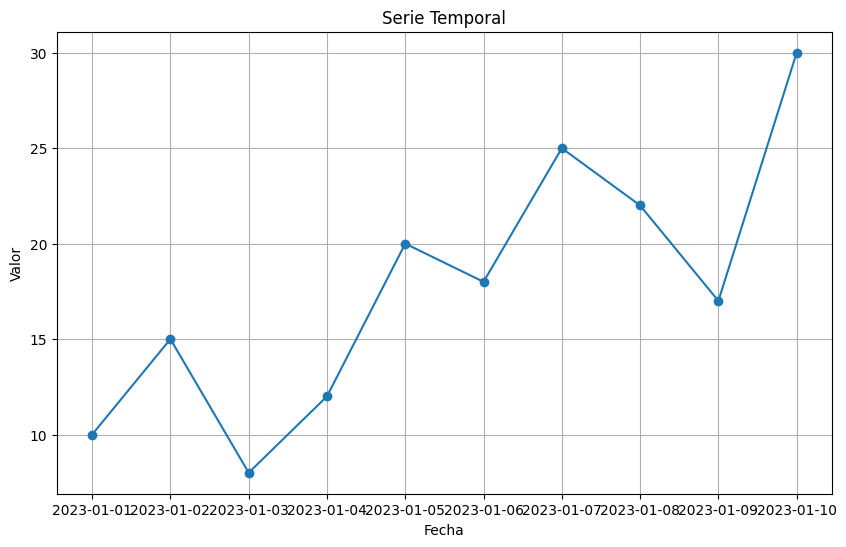

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame con una columna de fechas llamada 'Fecha'
# y una columna de valores llamada 'Valor'
# Asegúrate de tener pandas y matplotlib instalados: pip install pandas matplotlib

# Crear un DataFrame de ejemplo
data = {'Fecha': pd.date_range(start='2023-01-01', end='2023-01-10'),
        'Valor': [10, 15, 8, 12, 20, 18, 25, 22, 17, 30]}
df = pd.DataFrame(data)

# Establecer la columna 'Fecha' como el índice
df.set_index('Fecha', inplace=True)

# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Valor'], marker='o', linestyle='-')
plt.title('Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


##Phase 2 (Learn, Predict)

In [ ]:
df = pd.read_parquet('https://raw.githubusercontent.com/SergiFuster/Rent-a-bike/main/putback_date_bench.parquet')

In [ ]:
df.shape

(1961118, 2)

# Analysis loan_historical

##putbacks in minutes

In [ ]:
import pandas as pd
loan_historical = pd.read_csv("rent-a-bike/loan_historical.csv")

In [ ]:
loan_historical.head()

,uuid,loan_uuid,use_uuid,bicycle_uuid,loan_anchor_uuid,loan_date_created,putback_uuid,putback_anchor_uuid,putback_date_created,type_access,app_loan
0,3030091c81504a6ebd9bfd235201da35,66ba875ce3eb455995df263a5d02e0f0,f9add8ab562f47bd95ff08158ffbc0c2,bfe9c897c1c247818078a811b4da92f7,952813483c094cac84c4de86d74b5e83,2015-10-01 17:20:57,8cd3f826d74a48b4a67cd2ed734427d1,c8dd262f03a54d3a9256c2615838d212,2015-10-01 17:25:43,UNKNOWN,0
1,30306e2128344397a19e4560c13c6df3,3306ee5bf2a448fd8ce78487b0a66f2d,a9922be4cb44446eaec67a9986d425cc,c93b2d621390495f9f1c055547f8e761,9d2c931e372e4ebeb623e856512f23d5,2017-03-29 05:54:51,1998b8b07aa0449eb74a5fb892221c72,9d2c931e372e4ebeb623e856512f23d5,2017-03-29 05:54:55,UNKNOWN,0
2,30301e39eb624d9eb72f5059085e2061,4e945fb7cb8b47a88e1ff71e6ee63e64,657a7b9621c343089da08dbab3809a69,da52ac891853422995794fcfcd2f9302,785a4f131cd24836876ecfa484c522c6,2017-02-03 15:40:15,469a83d4a03b4ee9bd77d00c7039ad02,785a4f131cd24836876ecfa484c522c6,2017-02-03 15:41:06,UNKNOWN,0
3,30302721662340419c16c4fe41ac7ba8,624b13a7392647589a4d1813f72e67a9,e2b0360fe242414eb019dcc8012826cb,13c86ae66fc0475497e3538f49a3f749,f5cb5d376a9347b0b9b3f1def914fabd,2016-03-30 20:03:42,f7cd5e0e4e194a8f85edfe7397bff440,30ffc877ff7142f4b63bdff376ad5102,2016-03-30 20:47:15,UNKNOWN,0
4,30302ee207034a169a2c34715c393808,12fe46b6c56e4b528b2bff07233914e0,1fc76f44951e4f4e9fe40cf13c78f28a,9dbda7150ccb4d839bdfade7294f5b41,f890bef5313340ad86f8a7d990991086,2017-01-28 13:55:30,4297d939a6254a1896ee3cf281907213,84121542ed9e42d9996a172e626ae3be,2017-01-28 14:05:31,UNKNOWN,0


In [ ]:
loan_historical["count"] = 1

In [ ]:
loan_historical = loan_historical[loan_historical['putback_date_created'] != 'putback_date_created'] # Evita errores con la columna datetime

In [ ]:
loan_historical['putback_date_created'] = pd.to_datetime(loan_historical['putback_date_created'])

In [ ]:
loan_historical['putback_date_created'] = loan_historical['putback_date_created'].dt.floor('T')  # 'T' es para minutos

In [ ]:
resultado = loan_historical.groupby(['putback_anchor_uuid', 'putback_date_created']).sum().reset_index()

<ipython-input-14-b01f2de7410b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultado = loan_historical.groupby(['putback_anchor_uuid', 'putback_date_created']).sum().reset_index()


In [ ]:
resultado.head()

,putback_anchor_uuid,putback_date_created,count
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 10:31:00,1
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 17:56:00,1
2,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 19:57:00,1
3,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 23:03:00,1
4,015d97fc30cf4d3096498873c79c3ae8,2015-06-01 09:32:00,1


In [ ]:
resultado.shape

(1366239, 3)

In [ ]:
resultado["count"].sort_values(ascending=False).head(20)

219100     615
967637     615
261437     611
614715     602
1164680    556
1276024    365
373138     205
1094460    204
800201     201
946265     137
347107     134
745814     129
818719     125
1016702    123
915923      81
1257533     69
1297205     63
700334      57
399014      57
698095      55
Name: count, dtype: int64

In [ ]:
resultado = resultado.drop(columns=["count"])

In [ ]:
resultado.head()

,putback_anchor_uuid,putback_date_created
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 10:31:00
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 17:56:00
2,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 19:57:00
3,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 23:03:00
4,015d97fc30cf4d3096498873c79c3ae8,2015-06-01 09:32:00


In [ ]:
column_names = ['anchor_uuid', 'date']
resultado.columns = column_names

In [ ]:
resultado.head()

,anchor_uuid,date
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 10:31:00
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 17:56:00
2,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 19:57:00
3,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 23:03:00
4,015d97fc30cf4d3096498873c79c3ae8,2015-06-01 09:32:00


In [ ]:
benches = pd.read_csv("rent-a-bike/benches_anchors.csv")

benches_columns = ["anchor_uuid", "bench_uuid"]

putbacks_benches = pd.merge(resultado, benches[benches_columns], on='anchor_uuid', how='left')
putbacks_benches.drop("anchor_uuid", axis=1, inplace=True)

In [ ]:
putbacks_benches.head()

,date,bench_uuid
0,2015-05-29 10:31:00,1b74778b88b143e59f80e796bd78d1b2
1,2015-05-29 17:56:00,1b74778b88b143e59f80e796bd78d1b2
2,2015-05-29 19:57:00,1b74778b88b143e59f80e796bd78d1b2
3,2015-05-30 23:03:00,1b74778b88b143e59f80e796bd78d1b2
4,2015-06-01 09:32:00,1b74778b88b143e59f80e796bd78d1b2


In [ ]:
# putbacks_benches['date'] = putbacks_benches['date'].dt.floor('H')  # 'H' es para horas

In [ ]:
putbacks_benches.shape

(1366239, 2)

In [ ]:
putbacks_benches.head()

,date,bench_uuid
0,2015-05-29 10:31:00,1b74778b88b143e59f80e796bd78d1b2
1,2015-05-29 17:56:00,1b74778b88b143e59f80e796bd78d1b2
2,2015-05-29 19:57:00,1b74778b88b143e59f80e796bd78d1b2
3,2015-05-30 23:03:00,1b74778b88b143e59f80e796bd78d1b2
4,2015-06-01 09:32:00,1b74778b88b143e59f80e796bd78d1b2


In [ ]:
putbacks_benches['count'] = 1

In [ ]:
putbacks_benches.head()

,date,bench_uuid,count
0,2015-05-29 10:31:00,1b74778b88b143e59f80e796bd78d1b2,1
1,2015-05-29 17:56:00,1b74778b88b143e59f80e796bd78d1b2,1
2,2015-05-29 19:57:00,1b74778b88b143e59f80e796bd78d1b2,1
3,2015-05-30 23:03:00,1b74778b88b143e59f80e796bd78d1b2,1
4,2015-06-01 09:32:00,1b74778b88b143e59f80e796bd78d1b2,1


In [ ]:
putbacks_benches = putbacks_benches.groupby(['bench_uuid', 'date']).sum().reset_index()

In [ ]:
putbacks_benches.head()

,bench_uuid,date,count
0,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 08:29:00,1
1,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 10:19:00,1
2,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 14:26:00,1
3,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 16:43:00,1
4,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 18:48:00,1


In [ ]:
putbacks_benches["count"].sort_values(ascending=False).head(20)

307131     25
466156     22
800833     21
464886     20
1114878    20
300910     20
444345     19
1114049    19
339833     18
450151     17
816487     16
421443     15
438250     15
799603     15
1122941    15
435303     15
797421     14
451987     14
1147953    14
310761     14
Name: count, dtype: int64

###Analisis

In [ ]:
timeserie = putbacks_benches[putbacks_benches['bench_uuid'] == '1052d66853ab4101b4e35e7c2d83fb39']

---------------------RELLENAR CON 0s-------------------------

In [ ]:
timeserie.head()

,bench_uuid,date,count
0,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 08:29:00,1
1,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 10:19:00,1
2,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 14:26:00,1
3,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 16:43:00,1
4,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 18:48:00,1


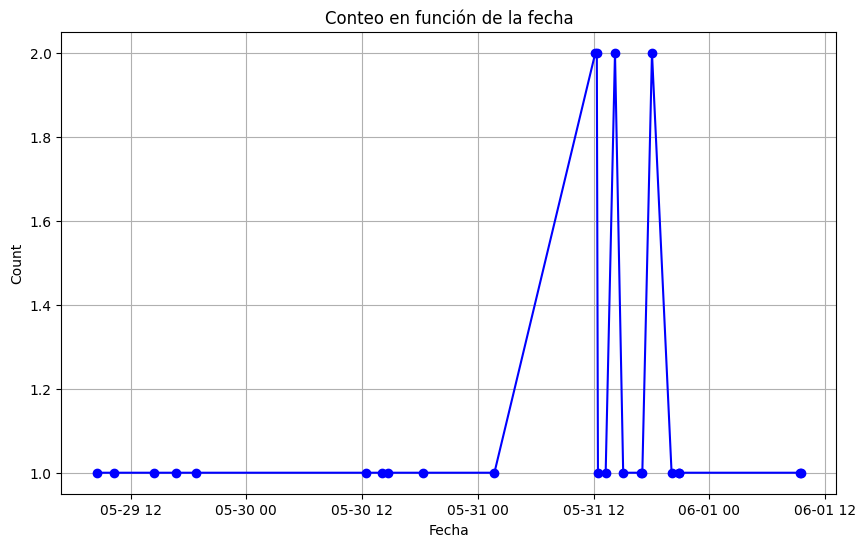

In [ ]:
import matplotlib.pyplot as plt

hours = 24
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(timeserie['date'][:hours], timeserie['count'][:hours], marker='o', color='b')

# Personalizar el gráfico
plt.title('Conteo en función de la fecha')
plt.xlabel('Fecha')
plt.ylabel('Count')
plt.grid(True)

# Mostrar el gráfico
plt.show()

##loans in minutes

In [ ]:
import pandas as pd
loan_historical = pd.read_csv("rent-a-bike/loan_historical.csv")

In [ ]:
loan_historical.head()

,uuid,loan_uuid,use_uuid,bicycle_uuid,loan_anchor_uuid,loan_date_created,putback_uuid,putback_anchor_uuid,putback_date_created,type_access,app_loan
0,3030091c81504a6ebd9bfd235201da35,66ba875ce3eb455995df263a5d02e0f0,f9add8ab562f47bd95ff08158ffbc0c2,bfe9c897c1c247818078a811b4da92f7,952813483c094cac84c4de86d74b5e83,2015-10-01 17:20:57,8cd3f826d74a48b4a67cd2ed734427d1,c8dd262f03a54d3a9256c2615838d212,2015-10-01 17:25:43,UNKNOWN,0
1,30306e2128344397a19e4560c13c6df3,3306ee5bf2a448fd8ce78487b0a66f2d,a9922be4cb44446eaec67a9986d425cc,c93b2d621390495f9f1c055547f8e761,9d2c931e372e4ebeb623e856512f23d5,2017-03-29 05:54:51,1998b8b07aa0449eb74a5fb892221c72,9d2c931e372e4ebeb623e856512f23d5,2017-03-29 05:54:55,UNKNOWN,0
2,30301e39eb624d9eb72f5059085e2061,4e945fb7cb8b47a88e1ff71e6ee63e64,657a7b9621c343089da08dbab3809a69,da52ac891853422995794fcfcd2f9302,785a4f131cd24836876ecfa484c522c6,2017-02-03 15:40:15,469a83d4a03b4ee9bd77d00c7039ad02,785a4f131cd24836876ecfa484c522c6,2017-02-03 15:41:06,UNKNOWN,0
3,30302721662340419c16c4fe41ac7ba8,624b13a7392647589a4d1813f72e67a9,e2b0360fe242414eb019dcc8012826cb,13c86ae66fc0475497e3538f49a3f749,f5cb5d376a9347b0b9b3f1def914fabd,2016-03-30 20:03:42,f7cd5e0e4e194a8f85edfe7397bff440,30ffc877ff7142f4b63bdff376ad5102,2016-03-30 20:47:15,UNKNOWN,0
4,30302ee207034a169a2c34715c393808,12fe46b6c56e4b528b2bff07233914e0,1fc76f44951e4f4e9fe40cf13c78f28a,9dbda7150ccb4d839bdfade7294f5b41,f890bef5313340ad86f8a7d990991086,2017-01-28 13:55:30,4297d939a6254a1896ee3cf281907213,84121542ed9e42d9996a172e626ae3be,2017-01-28 14:05:31,UNKNOWN,0


In [ ]:
loan_historical["count"] = 1

In [ ]:
loan_historical = loan_historical[loan_historical['loan_date_created'] != 'loan_date_created'] # Evita errores con la columna datetime

In [ ]:
loan_historical['loan_date_created'] = pd.to_datetime(loan_historical['loan_date_created'])

In [ ]:
loan_historical['loan_date_created'] = loan_historical['loan_date_created'].dt.floor('T')  # 'T' es para minutos

In [ ]:
resultado = loan_historical.groupby(['loan_anchor_uuid', 'loan_date_created']).sum().reset_index()

<ipython-input-34-3f67b019c1e3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultado = loan_historical.groupby(['loan_anchor_uuid', 'loan_date_created']).sum().reset_index()


In [ ]:
resultado.head()

,loan_anchor_uuid,loan_date_created,count
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 10:17:00,1
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 11:15:00,1
2,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 19:35:00,1
3,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 10:33:00,1
4,015d97fc30cf4d3096498873c79c3ae8,2015-05-31 01:06:00,1


In [ ]:
resultado.shape

(1364195, 3)

In [ ]:
resultado["count"].sort_values(ascending=False).head(20)

1360894    615
774353     615
7072       611
472641     602
98351      556
98352      365
1244564    205
1239546    204
638739     201
943868     137
345512     134
1292283    129
943869     125
429728     123
698733      81
1045418     69
383619      63
362709      57
1277385     57
1005438     55
Name: count, dtype: int64

In [ ]:
resultado = resultado.drop(columns=["count"])

In [ ]:
resultado.head()

,loan_anchor_uuid,loan_date_created
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 10:17:00
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 11:15:00
2,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 19:35:00
3,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 10:33:00
4,015d97fc30cf4d3096498873c79c3ae8,2015-05-31 01:06:00


In [ ]:
column_names = ['anchor_uuid', 'date']
resultado.columns = column_names

In [ ]:
resultado.head()

,anchor_uuid,date
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 10:17:00
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 11:15:00
2,015d97fc30cf4d3096498873c79c3ae8,2015-05-29 19:35:00
3,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 10:33:00
4,015d97fc30cf4d3096498873c79c3ae8,2015-05-31 01:06:00


In [ ]:
benches = pd.read_csv("rent-a-bike/benches_anchors.csv")

benches_columns = ["anchor_uuid", "bench_uuid"]

loans_benches = pd.merge(resultado, benches[benches_columns], on='anchor_uuid', how='left')
loans_benches.drop("anchor_uuid", axis=1, inplace=True)

In [ ]:
loans_benches.head()

,date,bench_uuid
0,2015-05-29 10:17:00,1b74778b88b143e59f80e796bd78d1b2
1,2015-05-29 11:15:00,1b74778b88b143e59f80e796bd78d1b2
2,2015-05-29 19:35:00,1b74778b88b143e59f80e796bd78d1b2
3,2015-05-30 10:33:00,1b74778b88b143e59f80e796bd78d1b2
4,2015-05-31 01:06:00,1b74778b88b143e59f80e796bd78d1b2


In [ ]:
# loans_benches['date'] = loans_benches['date'].dt.floor('T')  # 'H' es para horas

In [ ]:
loans_benches.shape

(1364195, 2)

In [ ]:
loans_benches.head()

,date,bench_uuid
0,2015-05-29 10:17:00,1b74778b88b143e59f80e796bd78d1b2
1,2015-05-29 11:15:00,1b74778b88b143e59f80e796bd78d1b2
2,2015-05-29 19:35:00,1b74778b88b143e59f80e796bd78d1b2
3,2015-05-30 10:33:00,1b74778b88b143e59f80e796bd78d1b2
4,2015-05-31 01:06:00,1b74778b88b143e59f80e796bd78d1b2


In [ ]:
loans_benches['count'] = 1

In [ ]:
loans_benches.head()

,date,bench_uuid,count
0,2015-05-29 10:17:00,1b74778b88b143e59f80e796bd78d1b2,1
1,2015-05-29 11:15:00,1b74778b88b143e59f80e796bd78d1b2,1
2,2015-05-29 19:35:00,1b74778b88b143e59f80e796bd78d1b2,1
3,2015-05-30 10:33:00,1b74778b88b143e59f80e796bd78d1b2,1
4,2015-05-31 01:06:00,1b74778b88b143e59f80e796bd78d1b2,1


In [ ]:
loans_benches = loans_benches.groupby(['bench_uuid', 'date']).sum().reset_index()

In [ ]:
loans_benches.head()

,bench_uuid,date,count
0,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 11:47:00,1
1,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 12:57:00,1
2,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 15:01:00,1
3,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 17:34:00,1
4,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 18:24:00,1


In [ ]:
loans_benches["count"].sort_values(ascending=False).head(20)

614871     8
465569     7
858750     7
796112     7
858666     7
1188888    7
1050694    7
588719     7
1050745    7
1088449    7
72199      7
536491     7
588400     7
1180522    7
588393     7
636437     7
577049     7
638294     7
1089008    7
471409     7
Name: count, dtype: int64

###Analisis

In [ ]:
timeserie = loans_benches[loans_benches['bench_uuid'] == '1052d66853ab4101b4e35e7c2d83fb39']

---------------------RELLENAR CON 0s-------------------------

In [ ]:
timeserie.head()

,bench_uuid,date,count
0,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 11:47:00,1
1,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 12:57:00,1
2,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 15:01:00,1
3,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 17:34:00,1
4,1052d66853ab4101b4e35e7c2d83fb39,2015-05-29 18:24:00,1


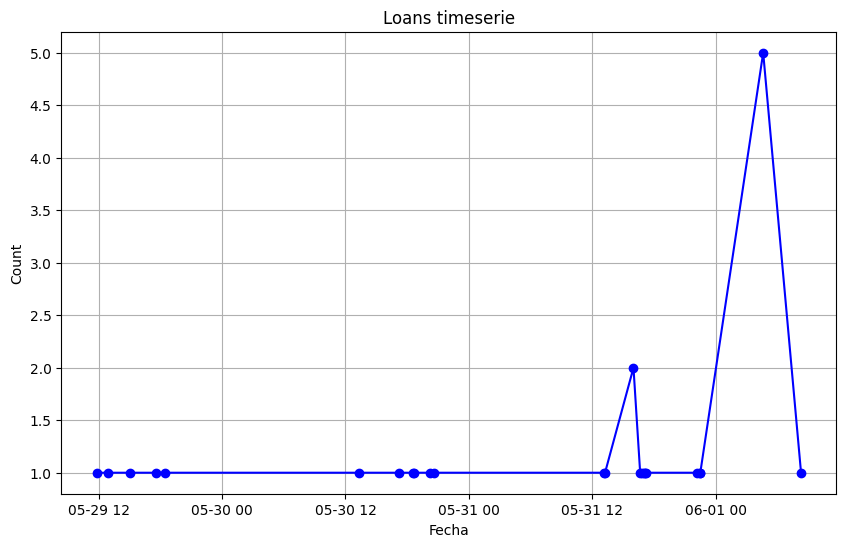

In [ ]:
import matplotlib.pyplot as plt

hours = 24
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(timeserie['date'][:hours], timeserie['count'][:hours], marker='o', color='b')

# Personalizar el gráfico
plt.title('Loans timeserie')
plt.xlabel('Fecha')
plt.ylabel('Count')
plt.grid(True)

# Mostrar el gráfico
plt.show()

##Analisis conjunto

In [ ]:
loans_timeserie = loans_benches[loans_benches['bench_uuid'] == '1052d66853ab4101b4e35e7c2d83fb39']
putbacks_timeserie = putbacks_benches[putbacks_benches['bench_uuid'] == '1052d66853ab4101b4e35e7c2d83fb39']

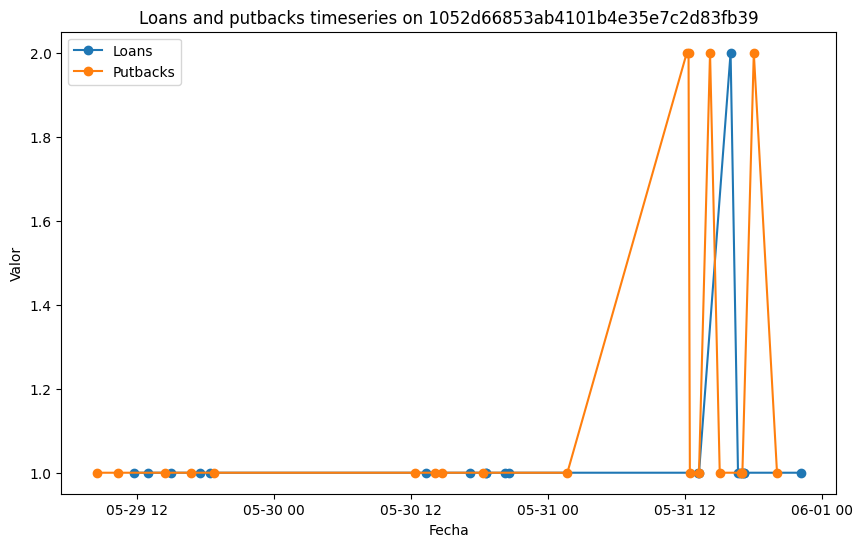

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
entradas = 20
# Plotear las dos series temporales
plt.plot(loans_timeserie['date'][:entradas], loans_timeserie['count'][:entradas], label='Loans', marker='o')
plt.plot(putbacks_timeserie['date'][:entradas], putbacks_timeserie['count'][:entradas], label='Putbacks', marker='o')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Loans and putbacks timeseries on 1052d66853ab4101b4e35e7c2d83fb39')
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.show()


#Utils

##Bicis por bancada

Cuantas bicis cabe en cada bancada:

In [ ]:
!wget -q https://krono.act.uji.es/IDIA/rent-a-bike.tgz

In [ ]:
import tarfile

# Descomprimir el archivo TGZ
with tarfile.open('./rent-a-bike.tgz', 'r:gz') as tar:
    tar.extractall('./')

In [ ]:
import pandas as pd
benches_anchors = pd.read_csv("rent-a-bike/benches_anchors.csv")

In [ ]:
benches_anchors.head()

,bench_uuid,anchor_uuid,anchor_number,bicycle_number,date_created
0,6e937c0c2bc34ecab5c38ce38a4448fc,12c77d7fc3484951b813baf4736c280e,1,NaN,2017-06-07 11:13:07
1,6e937c0c2bc34ecab5c38ce38a4448fc,29e0b98665824e268cceef372f8c1b13,14,1172,2017-06-07 14:13:51
2,6e937c0c2bc34ecab5c38ce38a4448fc,64a388997af84bbf8b223e228631d6ea,9,NaN,2017-06-07 14:48:30
3,6e937c0c2bc34ecab5c38ce38a4448fc,73310906524e4d03a3d220445b91abf5,5,NaN,2017-05-30 22:06:19
4,6e937c0c2bc34ecab5c38ce38a4448fc,7c2b8dd1921249ac96eab50f2c196438,6,NaN,2017-06-07 14:28:28


In [ ]:
benches_anchors['count'] = 1
max_anchors = benches_anchors.groupby('bench_uuid')['count'].sum().reset_index()
max_anchors = max_anchors[max_anchors['bench_uuid'] != 'bench_uuid']

In [ ]:
max_anchors.head()

,bench_uuid,count
0,1052d66853ab4101b4e35e7c2d83fb39,16
1,11cf31b2f8914f7a953b03ae05518b5b,14
2,1b74778b88b143e59f80e796bd78d1b2,14
3,220f33850f9a497790493383c6c577c4,14
4,314750337a4247479ed21c59d5b66fd4,16


Guardamos la información para poder acceder a ella posteriormente sin necesidad de volver a calcularla

In [ ]:
max_anchors.to_parquet('max_anchors.parquet', index=False)

#Bikes in Benches Part I

In [ ]:
!wget -q https://krono.act.uji.es/IDIA/rent-a-bike.tgz

In [ ]:
import tarfile

# Descomprimir el archivo TGZ
with tarfile.open('./rent-a-bike.tgz', 'r:gz') as tar:
    tar.extractall('./')

In [ ]:
import pandas as pd
loan_historical = pd.read_csv("rent-a-bike/loan_historical.csv")[['putback_date_created', 'putback_anchor_uuid', 'loan_date_created', 'loan_anchor_uuid']]
loan_historical = loan_historical[loan_historical['putback_date_created'] != 'putback_date_created']
print(len(loan_historical))
# --- Todo esto lo hacemos porque detectamos que algunos anchor ids de los putbacks no existian en los benches y luego resultaba en NaNs descuadrando las cuentas
benches = pd.read_csv("rent-a-bike/benches_anchors.csv")
benches_columns = ["anchor_uuid", "bench_uuid"]
loan_historical.columns = ['putback_date_created', 'anchor_uuid', 'loan_date_created', 'loan_anchor_uuid']
loan_historical = pd.merge(loan_historical, benches[benches_columns], on='anchor_uuid', how='left')
loan_historical = loan_historical.dropna()
loan_historical.columns = ['putback_date_created', 'putback_anchor_uuid', 'loan_date_created', 'loan_anchor_uuid', 'putback_bench_uuid']\

loan_historical.columns = ['putback_date_created', 'putback_anchor_uuid', 'loan_date_created', 'anchor_uuid', 'putback_bench_uuid']
loan_historical = pd.merge(loan_historical, benches[benches_columns], on='anchor_uuid', how='left')
loan_historical = loan_historical.dropna()
loan_historical.columns = ['putback_date_created', 'putback_anchor_uuid', 'loan_date_created', 'loan_anchor_uuid', 'putback_bench_uuid', 'loan_bench_uuid']
# ---
print(len(loan_historical))
loan_historical.head()

1380026
1379919


,putback_date_created,putback_anchor_uuid,loan_date_created,loan_anchor_uuid,putback_bench_uuid,loan_bench_uuid
0,2015-10-01 17:25:43,c8dd262f03a54d3a9256c2615838d212,2015-10-01 17:20:57,952813483c094cac84c4de86d74b5e83,d55ddb5d314d4e408b655b86f672fd14,7b71e02dee534421998c2f52a8032653
1,2017-03-29 05:54:55,9d2c931e372e4ebeb623e856512f23d5,2017-03-29 05:54:51,9d2c931e372e4ebeb623e856512f23d5,8ecf5f487a7b44ccac993507bf5e374f,8ecf5f487a7b44ccac993507bf5e374f
2,2017-02-03 15:41:06,785a4f131cd24836876ecfa484c522c6,2017-02-03 15:40:15,785a4f131cd24836876ecfa484c522c6,62604f4f3b624012bcd1b8bd35c7fd10,62604f4f3b624012bcd1b8bd35c7fd10
3,2016-03-30 20:47:15,30ffc877ff7142f4b63bdff376ad5102,2016-03-30 20:03:42,f5cb5d376a9347b0b9b3f1def914fabd,e8624dfee4b74c2bbf5a4b53797d90df,ca22c2a87b994b50b5f3e8527c9f8b8d
4,2017-01-28 14:05:31,84121542ed9e42d9996a172e626ae3be,2017-01-28 13:55:30,f890bef5313340ad86f8a7d990991086,d23350e915274e42a7d4e35527f27fa8,6e937c0c2bc34ecab5c38ce38a4448fc


##Putbacks

In [ ]:
putbacks_by_bench = loan_historical[['putback_bench_uuid', 'putback_date_created']]

In [ ]:
putbacks_by_bench['putback_date_created'] = pd.to_datetime(putbacks_by_bench['putback_date_created'])

<ipython-input-7-b78f15e76162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putbacks_by_bench['putback_date_created'] = pd.to_datetime(putbacks_by_bench['putback_date_created'])


In [ ]:
column_names = ['bench_uuid', 'date']
putbacks_by_bench.columns = column_names

In [ ]:
print(f'Total putbacks: {len(putbacks_by_bench)}')
putbacks_by_bench.head(2)

Total putbacks: 1379919


,bench_uuid,date
0,d55ddb5d314d4e408b655b86f672fd14,2015-10-01 17:25:43
1,8ecf5f487a7b44ccac993507bf5e374f,2017-03-29 05:54:55


##Loans

In [ ]:
loans_by_bench = loan_historical[['loan_date_created', 'loan_bench_uuid']]

In [ ]:
loans_by_bench['loan_date_created'] = pd.to_datetime(loans_by_bench['loan_date_created'])

<ipython-input-12-123e12c7d44c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_by_bench['loan_date_created'] = pd.to_datetime(loans_by_bench['loan_date_created'])


In [ ]:
column_names = ['date', 'bench_uuid']
loans_by_bench.columns = column_names

In [ ]:
print(f'Total loans: {len(loans_by_bench)}')
loans_by_bench.head(2)

Total loans: 1379919


,date,bench_uuid
0,2015-10-01 17:20:57,7b71e02dee534421998c2f52a8032653
1,2017-03-29 05:54:51,8ecf5f487a7b44ccac993507bf5e374f


##Bench Status Building

In [ ]:
putbacks_by_bench['variation'] = 1
loans_by_bench['variation'] = -1

<ipython-input-15-4dc124773c37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putbacks_by_bench['variation'] = 1
<ipython-input-15-4dc124773c37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_by_bench['variation'] = -1


In [ ]:
print(f'Number of putbacks: {len(putbacks_by_bench)}')
print(f'Number of loans: {len(loans_by_bench)}')

Number of putbacks: 1379919
Number of loans: 1379919


In [ ]:
transactions_by_bench = pd.concat([putbacks_by_bench, loans_by_bench])

In [ ]:
print(f'Total transactions: {len(transactions_by_bench)}')

Total transactions: 2759838


In [ ]:
transactions_by_bench.head(5)

,bench_uuid,date,variation
0,d55ddb5d314d4e408b655b86f672fd14,2015-10-01 17:25:43,1
1,8ecf5f487a7b44ccac993507bf5e374f,2017-03-29 05:54:55,1
2,62604f4f3b624012bcd1b8bd35c7fd10,2017-02-03 15:41:06,1
3,e8624dfee4b74c2bbf5a4b53797d90df,2016-03-30 20:47:15,1
4,d23350e915274e42a7d4e35527f27fa8,2017-01-28 14:05:31,1


In [ ]:
temporarily_sorted_transactions = transactions_by_bench.sort_values(by='date')

In [ ]:
print(len(temporarily_sorted_transactions)/2)
temporarily_sorted_transactions.head(5)

1379919.0


,bench_uuid,date,variation
432926,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:52:59,-1
1157153,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:53:32,-1
432926,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:55:00,1
346241,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 17:41:56,-1
1290731,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 19:44:24,-1


In [ ]:
# Dict where we are gonna keep track of total amount of bikes per bench
benches_total_tracking_df = pd.read_csv("rent-a-bike/benches.csv")[['uuid']]

In [ ]:
benches_total_tracking_df['total'] = 0
benches_total_tracking = benches_total_tracking_df.set_index('uuid')['total'].to_dict()

In [ ]:
# Lo usaremos para corregir los totales de bicis por bancada
max_anchors = pd.read_parquet('https://raw.githubusercontent.com/SergiFuster/Rent-a-bike/main/max_anchors.parquet')
max_anchors = max_anchors.set_index('bench_uuid')['count'].to_dict()

In [ ]:
# Hemos dado por hecho que los movimientos de bicis hechos por bicicas no están representados
# en las tablas de la based de datos, así que intentamos inferir el número de bicis
# en las estaciones cuando el estado de estas no muestra datos verosimilares.
def bicycles_inference(bench_uuid, variation):
    proposed_total = benches_total_tracking[bench_uuid] + variation
    guessed_total = proposed_total
    if proposed_total == -1: guessed_total += max_anchors[bench_uuid]
    elif proposed_total > max_anchors[bench_uuid]: guessed_total -= max_anchors[bench_uuid]
    return guessed_total

In [ ]:
from tqdm.notebook import tqdm
import time

total_iterations = len(temporarily_sorted_transactions)
progress_bar = tqdm(total=total_iterations, desc='Processing')

results = []

for i,(row, transaction) in enumerate(temporarily_sorted_transactions.iterrows()):
  bench_id = transaction['bench_uuid']
  date = transaction['date']
  variation = transaction['variation']
  benches_total_tracking[bench_id] = bicycles_inference(bench_id, variation)
  # benches_total_tracking[bench_id] = max(min(benches_total_tracking[bench_id], max_anchors[bench_id]), 0) # Evitamos pasar los límites de las bancadas
  current_total = benches_total_tracking[bench_id]
  results.append([bench_id, date, current_total])
  progress_bar.update()
progress_bar.close()

Processing:   0%|          | 0/2759838 [00:00<?, ?it/s]

In [ ]:
results[:5]

[['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 14:52:59'), 13],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 14:53:32'), 12],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 14:55:00'), 13],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 17:41:56'), 12],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 19:44:24'), 11]]

###Tests

In [ ]:
df = pd.DataFrame(results)
print(df.min())
print(df.max())

0    1052d66853ab4101b4e35e7c2d83fb39
1                 2013-01-11 14:52:59
2                                   0
dtype: object
0    ff62b06b265945f8bf2ab11446c6fad2
1                 2017-04-29 19:12:47
2                                  28
dtype: object


In [ ]:
import numpy as np
np.sum(np.array(list(benches_total_tracking.values())))

477

In [ ]:
benches_total_tracking

{'6e937c0c2bc34ecab5c38ce38a4448fc': 6,
 '1052d66853ab4101b4e35e7c2d83fb39': 14,
 '11cf31b2f8914f7a953b03ae05518b5b': 9,
 '1b74778b88b143e59f80e796bd78d1b2': 14,
 '220f33850f9a497790493383c6c577c4': 13,
 '314750337a4247479ed21c59d5b66fd4': 3,
 '339b28b39afc45b1919c9dfd81659133': 6,
 '3c5305ba22f6429288fb8c304f82aec6': 5,
 '4515d76c4bc148229fdbf5723e98bae8': 4,
 '46f85e3714414d5eb22eac9f665da175': 8,
 '47557ce0a9844af683aeb9568b9fdf96': 1,
 '50dee8c232d240c0b5b7b4555f152163': 11,
 '564eab36605a404ba722965ab23072a4': 9,
 '57f3f92ae55c4126bb51f0dffb474ae7': 10,
 '60b20f3eec6b4620b355be286d8587a4': 20,
 '62604f4f3b624012bcd1b8bd35c7fd10': 8,
 '6a26713624f94629ad309cb9f9af73f9': 25,
 '76c6542216784056a4f115c628892350': 13,
 '78948cf6b71d4414a59275bb053c7e08': 3,
 '7b71e02dee534421998c2f52a8032653': 16,
 '7e736d95171842b8b8ef426398cf63d3': 3,
 '7e7d61121ee047ef928069ee416c1572': 1,
 '7efea66c0c794a4d86850e3f144849e6': 7,
 '853a299c2b044237a48efef097d7bf39': 4,
 '891159c335d24e7aa15acbd3ec09c

In [ ]:
benches = pd.read_csv("rent-a-bike/benches.csv")
benches

NameError: name 'pd' is not defined

In [ ]:
import folium

# Crea un mapa centrado en las coordenadas dadas
mapa = folium.Map(location=(39.98567, -0.04935), zoom_start=12)
for index, row in benches.iterrows():
  coordenadas_punto = (row['latitude'], row['longitude'])
  folium.Marker(location=coordenadas_punto, popup=row['name']).add_to(mapa)
# Muestra el mapa
mapa.save('mapa_con_punto.html')  # Guarda el mapa en un archivo HTML
mapa

###Save in csv format


In [ ]:
import csv
# Nombre del archivo CSV
file_name = 'results.csv'

# Escribir la lista de listas en el archivo CSV
with open(file_name, 'w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv, delimiter=',')
    escritor_csv.writerows(results)

print(f"La lista de listas se ha almacenado en {file_name}.")

La lista de listas se ha almacenado en results.csv.


###Save in parquet format

In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Convertir la lista de listas a un DataFrame de pandas
df = pd.DataFrame(results, columns=['bench_id', 'date', 'total'])

# Convertir el DataFrame de pandas a una tabla de Arrow
table = pa.Table.from_pandas(df)

# Especificar el nombre del archivo Parquet
file_name = 'results.parquet'

# Guardar la tabla Arrow en formato Parquet
pq.write_table(table, file_name)

print(f"La lista de listas se ha almacenado en {file_name} en formato Parquet.")


La lista de listas se ha almacenado en results.parquet en formato Parquet.


# Bikes in Benches Part II

<font color=red> Finalmente no hemos hecho uso de esta sección ya que corregimos los errores directamente en el apartado anterior con la función que infiere el número de bicis

En la parte I hemos hecho una reconstrucción aproximada del estado de las bancadas en intervalos no uniformes de tiempo con una granularidad temporal de minutos. Hemos guardado el dataframe resultante en formato parquet y ahora solo es necesario descargar dicho archivo y seguir trabajando desde ahí. Este archivo tiene 3 columnas el id del banco, la fecha y el número de bicis en dicha fecha. Ahora es necesario corregir el error de estos datos ya que hemos partido sin información del estado inicial de las bancadas y luego hacer un procesamiento de la serie temporal: smoothing, normalización, análisis, etc.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_parquet('https://raw.githubusercontent.com/SergiFuster/Rent-a-bike/main/bikes_reconstruction.parquet')

###Visualization

In [ ]:
df.head(5)

,bench_id,date,total
0,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:52:59,13
1,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:53:32,12
2,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:55:00,13
3,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 17:41:56,12
4,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 19:44:24,11


In [ ]:
df_test = df[df['bench_id'] == '6e937c0c2bc34ecab5c38ce38a4448fc'][['date', 'total']]
print(len(df_test))
df_test.head()

38732


,date,total
0,2013-01-11 14:52:59,13
1,2013-01-11 14:53:32,12
2,2013-01-11 14:55:00,13
3,2013-01-11 17:41:56,12
4,2013-01-11 19:44:24,11


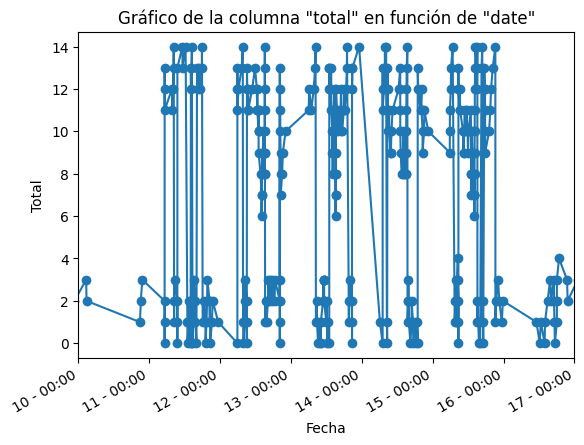

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Graficar la columna 'total' en función de 'date'
plt.plot(df_test['date'], df_test['total'], marker='o')
plt.title('Gráfico de la columna "total" en función de "date"')
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.xlim(pd.to_datetime('2016-01-10'), pd.to_datetime('2016-01-17'))

# Formatear las etiquetas del eje x
date_format = DateFormatter("%d - %H:%M")  # Mostrar día y hora
#date_format = DateFormatter("%d - %m")  # Mostrar día y mes
#date_format = DateFormatter("%H:%M")  # Mostrar solo horas y minutos
plt.gca().xaxis.set_major_formatter(date_format)

# Rotar las etiquetas para mejorar la legibilidad
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
df_test.head()

,date,total
0,2013-01-11 14:52:59,13
1,2013-01-11 14:53:32,12
2,2013-01-11 14:55:00,13
3,2013-01-11 17:41:56,12
4,2013-01-11 19:44:24,11


<Axes: >

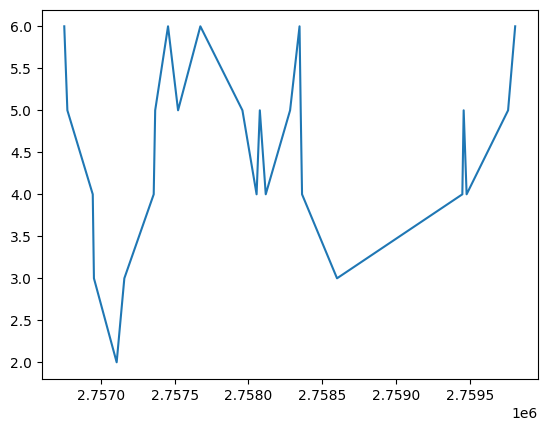

In [ ]:
sample = df_test[-25:]
sample['total'].plot()

#Pruebas con Spark

Ahora que ya tenemos el número de anchors para cada bench podemos quitar aquellas filas del datframe que excedan este máximo/mínimo.

Pero antes, como el proceso es costoso computacionalmente vamos a pasar el dataframe a Spark para paralelizar las operaciones y así agilizar el proceso.

In [ ]:
!pip -q install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pyspark.sql import SparkSession
import pandas as pd

# Crear una SparkSession
spark = SparkSession.builder.appName("pandas_to_spark").getOrCreate()

# Convertir el DataFrame de pandas a un DataFrame de Spark
spark_df = spark.createDataFrame(df)

# Mostrar el DataFrame de Spark
spark_df.show()

+--------------------+-------------------+-----+
|            bench_id|               date|total|
+--------------------+-------------------+-----+
|6e937c0c2bc34ecab...|2013-01-11 14:52:00|   -1|
|6e937c0c2bc34ecab...|2013-01-11 14:53:00|   -2|
|6e937c0c2bc34ecab...|2013-01-11 14:55:00|   -1|
|6e937c0c2bc34ecab...|2013-01-11 17:41:00|   -2|
|6e937c0c2bc34ecab...|2013-01-11 19:44:00|   -3|
|6e937c0c2bc34ecab...|2013-01-11 19:46:00|   -2|
|6e937c0c2bc34ecab...|2013-01-11 19:46:00|   -3|
|6e937c0c2bc34ecab...|2013-01-11 19:46:00|   -4|
|6e937c0c2bc34ecab...|2013-01-11 19:47:00|   -5|
|6e937c0c2bc34ecab...|2013-01-11 20:57:00|   -6|
|6e937c0c2bc34ecab...|2013-01-11 21:39:00|   -7|
|6e937c0c2bc34ecab...|2013-01-11 22:28:00|   -8|
|6e937c0c2bc34ecab...|2013-01-11 22:32:00|   -7|
|6e937c0c2bc34ecab...|2013-01-12 12:24:00|   -8|
|6e937c0c2bc34ecab...|2013-01-12 18:36:00|   -9|
|6e937c0c2bc34ecab...|2013-01-12 18:37:00|  -10|
|6e937c0c2bc34ecab...|2013-01-12 18:37:00|   -9|
|6e937c0c2bc34ecab..

In [ ]:
spark_df.printSchema()

root
 |-- bench_id: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- total: long (nullable = true)



In [ ]:
from pyspark.sql import functions as F

# Convertir el diccionario a DataFrame de Spark
max_anchors_spark = spark.createDataFrame(max_anchors, ['bench_id', 'umbral'])

# Unir los DataFrames utilizando la columna 'bench_id'
df_joined = spark_df.join(max_anchors_spark, 'bench_id', 'left_outer')

# Filtrar las filas que cumplen la condición
df_filtered = df_joined.filter(~((F.abs(df_joined['total']) > df_joined['umbral']) | (F.col('umbral').isNull())))

# Mostrar el resultado
df_filtered.show()

+--------------------+-------------------+-----+------+
|            bench_id|               date|total|umbral|
+--------------------+-------------------+-----+------+
|ff62b06b265945f8b...|2015-05-29 07:56:00|   -1|    16|
|ff62b06b265945f8b...|2015-05-29 07:56:00|   -2|    16|
|ff62b06b265945f8b...|2015-05-29 07:56:00|   -3|    16|
|ff62b06b265945f8b...|2015-05-29 07:56:00|   -4|    16|
|ff62b06b265945f8b...|2015-05-29 07:57:00|   -5|    16|
|ff62b06b265945f8b...|2015-05-29 07:57:00|   -6|    16|
|ff62b06b265945f8b...|2015-05-29 07:57:00|   -7|    16|
|ff62b06b265945f8b...|2015-05-29 07:57:00|   -8|    16|
|ff62b06b265945f8b...|2015-05-29 07:58:00|   -9|    16|
|ff62b06b265945f8b...|2015-05-29 09:10:00|  -10|    16|
|ff62b06b265945f8b...|2015-05-29 09:21:00|   -9|    16|
|ff62b06b265945f8b...|2015-05-29 09:35:00|   -8|    16|
|ff62b06b265945f8b...|2015-05-29 09:46:00|   -7|    16|
|ff62b06b265945f8b...|2015-05-29 09:49:00|   -6|    16|
|ff62b06b265945f8b...|2015-05-29 09:54:00|   -5|

In [ ]:
print(f'Total actual: {df_filtered.count()}')
print(f'Total anterior: {len(df)}')
print(f'Perdida: {len(df) - df_filtered.count()}')

Total actual: 813953
Total anterior: 2730327
Perdida: 1916374


#Test putback and loans instead of loan_historical

In [ ]:
!wget -q https://krono.act.uji.es/IDIA/rent-a-bike.tgz

^C


In [ ]:
import tarfile

# Descomprimir el archivo TGZ
with tarfile.open('./rent-a-bike.tgz', 'r:gz') as tar:
    tar.extractall('./')

##Putbacks

In [ ]:
import pandas as pd
putbacks = pd.read_csv("rent-a-bike/putbacks.csv")[['anchor_uuid', 'date_created']]

In [ ]:
putbacks = putbacks[putbacks['date_created'] != 'date_created'] # Evita errores con la columna datetime

In [ ]:
putbacks['date_created'] = pd.to_datetime(putbacks['date_created'])

In [ ]:
putbacks['date_created'] = putbacks['date_created'].dt.floor('T')  # 'T' es para minutos

In [ ]:
putbacks = putbacks.groupby(['anchor_uuid', 'date_created']).sum().reset_index() # Corregimos errores de sensor

In [ ]:
print(len(putbacks))
putbacks.head(2)

800761


,anchor_uuid,date_created
0,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 09:21:00
1,015d97fc30cf4d3096498873c79c3ae8,2015-05-30 10:31:00


In [ ]:
benches = pd.read_csv("rent-a-bike/benches_anchors.csv")

benches_columns = ["anchor_uuid", "bench_uuid"]

putbacks_by_bench = pd.merge(putbacks, benches[benches_columns], on='anchor_uuid', how='left')
putbacks_by_bench.drop("anchor_uuid", axis=1, inplace=True)

In [ ]:
putbacks_by_bench.head(2)

,date_created,bench_uuid
0,2015-05-30 09:21:00,1b74778b88b143e59f80e796bd78d1b2
1,2015-05-30 10:31:00,1b74778b88b143e59f80e796bd78d1b2


##Loans

In [ ]:
import pandas as pd
loans = pd.read_csv("rent-a-bike/loans.csv")[['anchor_uuid', 'date_created']]

In [ ]:
loans = loans[loans['date_created'] != 'date_created'] # Evita errores con la columna datetime

In [ ]:
loans['date_created'] = pd.to_datetime(loans['date_created'])

In [ ]:
loans['date_created'] = loans['date_created'].dt.floor('T')  # 'T' es para minutos

In [ ]:
loans = loans.groupby(['anchor_uuid', 'date_created']).sum().reset_index() # Corregimos errores de sensor

In [ ]:
print(len(loans))
loans.head(2)

759562


,anchor_uuid,date_created
0,015d97fc30cf4d3096498873c79c3ae8,2017-04-07 07:19:00
1,015d97fc30cf4d3096498873c79c3ae8,2017-04-07 07:20:00


In [ ]:
benches = pd.read_csv("rent-a-bike/benches_anchors.csv")

benches_columns = ["anchor_uuid", "bench_uuid"]

loans_by_bench = pd.merge(loans, benches[benches_columns], on='anchor_uuid', how='left')
loans_by_bench.drop("anchor_uuid", axis=1, inplace=True)

In [ ]:
loans_by_bench.head(2)

,date_created,bench_uuid
0,2017-04-07 07:19:00,1b74778b88b143e59f80e796bd78d1b2
1,2017-04-07 07:20:00,1b74778b88b143e59f80e796bd78d1b2


##Bench Status Building

In [ ]:
putbacks_by_bench['variation'] = 1
loans_by_bench['variation'] = -1

In [ ]:
print(f'Number of putbacks: {len(putbacks_by_bench)}')
print(f'Number of loans: {len(loans_by_bench)}')

Number of putbacks: 800761
Number of loans: 759562


In [ ]:
transactions_by_bench = pd.concat([putbacks_by_bench, loans_by_bench])

In [ ]:
print(f'Total transactions: {len(transactions_by_bench)}')

Total transactions: 1560323


In [ ]:
transactions_by_bench.head(5)

,date_created,bench_uuid,variation
0,2015-05-30 09:21:00,1b74778b88b143e59f80e796bd78d1b2,1
1,2015-05-30 10:31:00,1b74778b88b143e59f80e796bd78d1b2,1
2,2015-05-31 10:32:00,1b74778b88b143e59f80e796bd78d1b2,1
3,2015-05-31 11:02:00,1b74778b88b143e59f80e796bd78d1b2,1
4,2015-05-31 12:27:00,1b74778b88b143e59f80e796bd78d1b2,1


In [ ]:
temporarily_sorted_transactions = transactions_by_bench.sort_values(by='date_created')

In [ ]:
temporarily_sorted_transactions.head(5)

,date_created,bench_uuid,variation
427942,2013-01-11 14:52:00,6e937c0c2bc34ecab5c38ce38a4448fc,1
340978,2013-01-11 19:45:00,6e937c0c2bc34ecab5c38ce38a4448fc,1
124847,2013-01-11 19:45:00,6e937c0c2bc34ecab5c38ce38a4448fc,1
124848,2013-01-11 21:09:00,6e937c0c2bc34ecab5c38ce38a4448fc,1
481799,2013-01-11 21:09:00,6e937c0c2bc34ecab5c38ce38a4448fc,1


In [ ]:
# Dict where we are gonna keep track of total amount of bikes per bench
benches_total_tracking_df = pd.read_csv("rent-a-bike/benches.csv")[['uuid']]

In [ ]:
benches_total_tracking_df['total'] = 0
benches_total_tracking = benches_total_tracking_df.set_index('uuid')['total'].to_dict()

In [ ]:
temporarily_sorted_transactions = temporarily_sorted_transactions.dropna()

In [ ]:
# Lo usaremos para corregir los totales de bicis por bancada
max_anchors = pd.read_parquet('https://raw.githubusercontent.com/SergiFuster/Rent-a-bike/main/max_anchors.parquet')
max_anchors = max_anchors.set_index('bench_uuid')['count'].to_dict()

In [ ]:
from tqdm.notebook import tqdm
import time

total_iterations = len(temporarily_sorted_transactions)
progress_bar = tqdm(total=total_iterations, desc='Processing')

results = []

for i,(row, transaction) in enumerate(temporarily_sorted_transactions.iterrows()):
  bench_id = transaction['bench_uuid']
  date = transaction['date_created']
  variation = transaction['variation']
  benches_total_tracking[bench_id] += variation
  # benches_total_tracking[bench_id] = max(min(benches_total_tracking[bench_id], max_anchors[bench_id]), -max_anchors[bench_id]) # Evitamos pasar los límites de las bancadas
  current_total = benches_total_tracking[bench_id]
  results.append([bench_id, date, current_total])
  progress_bar.update()
progress_bar.close()

Processing:   0%|          | 0/1560323 [00:00<?, ?it/s]

In [ ]:
results[:5]

[['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 14:52:00'), 1],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 19:45:00'), 2],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 19:45:00'), 3],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 21:09:00'), 4],
 ['6e937c0c2bc34ecab5c38ce38a4448fc', Timestamp('2013-01-11 21:09:00'), 5]]

In [ ]:
df = pd.DataFrame(results, columns=['bench_id', 'date', 'bicycles'])
df.head()

,bench_id,date,bicycles
0,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:52:00,1
1,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 19:45:00,2
2,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 19:45:00,3
3,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 21:09:00,4
4,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 21:09:00,5


In [ ]:
print(df.max())
print(df.min())

bench_id    ff62b06b265945f8bf2ab11446c6fad2
date                     2017-06-07 14:48:00
bicycles                                4525
dtype: object
bench_id    1052d66853ab4101b4e35e7c2d83fb39
date                     2013-01-11 14:52:00
bicycles                                   1
dtype: object


###Save in csv format


In [ ]:
import csv
# Nombre del archivo CSV
file_name = 'results.csv'

# Escribir la lista de listas en el archivo CSV
with open(file_name, 'w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv, delimiter=',')
    escritor_csv.writerows(results)

print(f"La lista de listas se ha almacenado en {file_name}.")

La lista de listas se ha almacenado en results.csv.


###Save in parquet format

In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Convertir la lista de listas a un DataFrame de pandas
df = pd.DataFrame(results, columns=['bench_id', 'date', 'total'])

# Convertir el DataFrame de pandas a una tabla de Arrow
table = pa.Table.from_pandas(df)

# Especificar el nombre del archivo Parquet
file_name = 'results.parquet'

# Guardar la tabla Arrow en formato Parquet
pq.write_table(table, file_name)

print(f"La lista de listas se ha almacenado en {file_name} en formato Parquet.")


La lista de listas se ha almacenado en results.parquet en formato Parquet.


#Forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

###Bench Visualization

In [ ]:
!wget -q https://krono.act.uji.es/IDIA/rent-a-bike.tgz

In [ ]:
import tarfile

# Descomprimir el archivo TGZ
with tarfile.open('./rent-a-bike.tgz', 'r:gz') as tar:
    tar.extractall('./')

In [ ]:
benches = pd.read_csv("rent-a-bike/benches.csv")
benches

,uuid,name,latitude,longitude,date_created
0,6e937c0c2bc34ecab5c38ce38a4448fc,31. Ginjols,39.981739,-0.025990,2015-04-10 10:29:43
1,1052d66853ab4101b4e35e7c2d83fb39,32. Avda. Ferrandis Salvador,39.993622,0.026190,2015-04-10 10:29:43
2,11cf31b2f8914f7a953b03ae05518b5b,30. Plaza Fernando Herrero Tejedor,39.988350,-0.030150,2015-04-10 10:29:43
3,1b74778b88b143e59f80e796bd78d1b2,10. Plaza Doctor Marañón,39.979530,-0.034750,2015-04-10 10:29:43
4,220f33850f9a497790493383c6c577c4,35. Rio Nilo,39.974880,-0.034950,2015-04-10 10:29:43
5,314750337a4247479ed21c59d5b66fd4,29. Parque Geologo José Royo,39.978081,-0.039360,2015-04-10 10:29:43
6,339b28b39afc45b1919c9dfd81659133,04. Paseo Buenavista-Grao,39.973469,0.014650,2015-04-10 10:29:43
7,3c5305ba22f6429288fb8c304f82aec6,15. Huerto Sogueros,39.986671,-0.040870,2015-04-10 10:29:43
8,4515d76c4bc148229fdbf5723e98bae8,54. UJI - PaynoPain,39.993977,-0.073667,2016-10-11 10:31:34
9,46f85e3714414d5eb22eac9f665da175,41. Plaza La Paz,39.983849,-0.037840,2015-04-10 10:29:44


In [ ]:
import folium

# Crea un mapa centrado en las coordenadas dadas
mapa = folium.Map(location=(39.98567, -0.04935), zoom_start=12)
for index, row in benches.iterrows():
  coordenadas_punto = (row['latitude'], row['longitude'])
  folium.Marker(location=coordenadas_punto, popup=row['name']).add_to(mapa)
# Muestra el mapa
mapa.save('mapa_con_punto.html')  # Guarda el mapa en un archivo HTML
mapa

##Preparing Data

In [ ]:
df = pd.read_parquet('https://raw.githubusercontent.com/SergiFuster/Rent-a-bike/main/bikes_reconstruction.parquet')

In [ ]:
bench_id = '8d25325a2ad84fc288d8ccb4e00c25e8' # Select which you want to analize
df_test = df[df['bench_id'] == bench_id][['date', 'total']]
columns = ['Date', "Bicycles"]
df_test.columns = columns
print(df_test.shape)
df_test.head()

(138881, 2)


,Date,Bicycles
153,2015-05-29 07:03:54,27
154,2015-05-29 07:04:27,28
168,2015-05-29 07:08:20,27
187,2015-05-29 07:19:02,28
188,2015-05-29 07:19:02,1


In [ ]:
# Ajustando fechas a periodos de 15 minutos
df_test['Date'] = df_test['Date'].dt.floor('15T')
#Agrupando fechas y dejando el valor de las bicis en una media entera
df_test = df_test.groupby('Date')['Bicycles'].mean().round().reset_index()

# Establecer 'Date' como el índice
df_test = df_test.set_index('Date')

# Generar un rango de fechas con intervalos de 15 minutos
date_range = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='15T')

# Reindexar el DataFrame con el nuevo rango de fechas
df_test = df_test.reindex(date_range)

# Interpolar los valores faltantes
df_test['Bicycles'] = df_test['Bicycles'].interpolate(method='linear', limit_direction='both')

# Restaurar la columna 'Date' si es necesario
df_test = df_test.reset_index()

columns = ['Date', "Bicycles"]
df_test.columns = columns

In [ ]:
print(df_test.shape)
df_test.head()

(65156, 2)


,Date,Bicycles
0,2015-05-29 07:00:00,27.0
1,2015-05-29 07:15:00,14.0
2,2015-05-29 07:30:00,15.0
3,2015-05-29 07:45:00,26.0
4,2015-05-29 08:00:00,13.0


<Axes: >

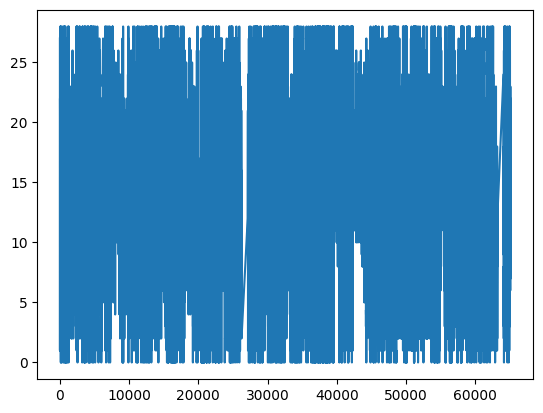

In [ ]:
df_test['Bicycles'].plot()

In [ ]:
df.head()

,bench_id,date,total
0,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:52:59,13
1,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:53:32,12
2,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 14:55:00,13
3,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 17:41:56,12
4,6e937c0c2bc34ecab5c38ce38a4448fc,2013-01-11 19:44:24,11


###Smoothing

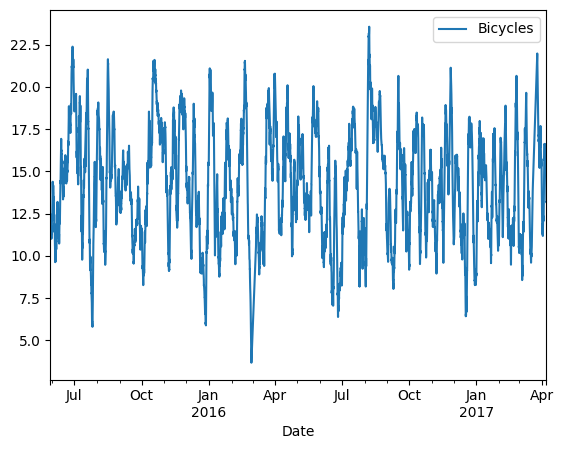

In [ ]:
df_smoothed = df_test.set_index('Date').rolling(window=300, center=True, min_periods=1).mean()
df_smoothed.plot()
df_smoothed = df_smoothed.reset_index()

#####<font color = 'red'>Just run this if there is missing data until 2015


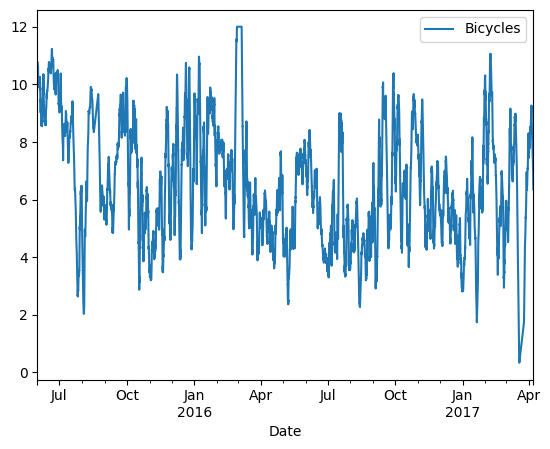

In [ ]:
# Define la fecha a partir de la cual deseas cortar los datos
initial_date = pd.to_datetime('2015-06-01')

# Filtra los datos a partir de la fecha de corte hasta el final
df_test = df_test[df_test['Date'] >= initial_date]

df_smoothed = df_test.set_index('Date').rolling(window=300, center=True, min_periods=1).mean()
df_smoothed.plot()
df_smoothed = df_smoothed.reset_index()

###Decomposition

#### Polynomical Analysis

In [ ]:
import numpy as np

x = df_test.index.to_numpy()

p1, res1, _, _ , _ = np.polyfit(x, df_test['Bicycles'], 1, full=True)
p1_fn = np.poly1d(p1)

p2, res2, _, _ , _ = np.polyfit(x, df_test['Bicycles'], 2, full=True)
p2_fn = np.poly1d(p2)

print("Trend (linear):", p1, res1)
print("Trend (quadratic):", p2, res2)

Trend (linear): [-3.64776239e-05  1.07533828e+01] [893644.88683612]
Trend (quadratic): [ 1.19321828e-09 -3.13365120e-04  2.63970767e+01] [884510.86939849]


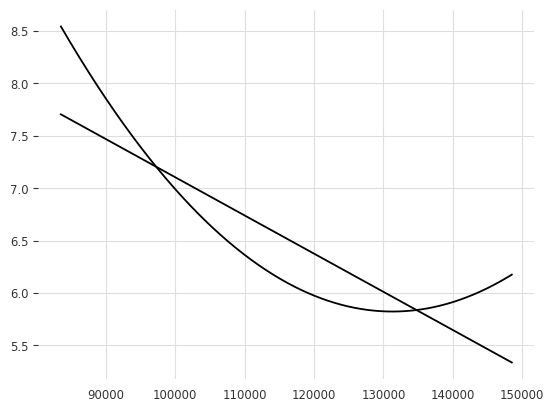

In [ ]:
plt.plot(x, p2_fn(x), 'k-')
plt.plot(x, p1_fn(x), 'k-')
# plt.plot(x, df_test['Bicycles'], 'go', ms=2)

**CHAT GPT**:

**Ajuste Lineal**:
* Coeficientes: [-2.59355405e-05, 7.07324657e+00]
  * La tendencia lineal indica que, en promedio, la variable está disminuyendo. El coeficiente negativo (-2.59355405e-05) para la variable x sugiere una disminución constante con el tiempo.
  * La pendiente de la línea es pequeña, lo que implica un cambio gradual.

**Ajuste Cuadrático**:
* Coeficientes: [4.79307842e-09, -2.10881264e-04, 8.26260169e+00]
  * La tendencia cuadrática muestra un patrón más complejo. El término cuadrático positivo (4.79307842e-09) indica que hay una componente cuadrática en la relación con el tiempo.
  * La pendiente inicial es negativa, pero la componente cuadrática puede cambiar la dirección de la tendencia en ciertos puntos.

**Residuos**:
* Residuo Ajuste Lineal: 75521.74106049
* Residuo Ajuste Cuadrático: 64603.27477688

Ambos residuos son relativamente grandes, lo que sugiere que los modelos polinómicos no capturan completamente todas las variaciones en los datos. Pueden haber patrones o estructuras en los datos que no se están teniendo en cuenta.

**Estacionalidad**:

La estacionalidad se refiere a patrones recurrentes o ciclos que ocurren a intervalos regulares en los datos. No hay información directa sobre la estacionalidad en los resultados proporcionados. Para analizar la estacionalidad, podrías explorar técnicas específicas como descomposición estacional o usar modelos más avanzados como modelos ARIMA que pueden capturar tanto tendencias como estacionalidad.

####Autocorrelation

Auto-correlación: 0.9999698920700607


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

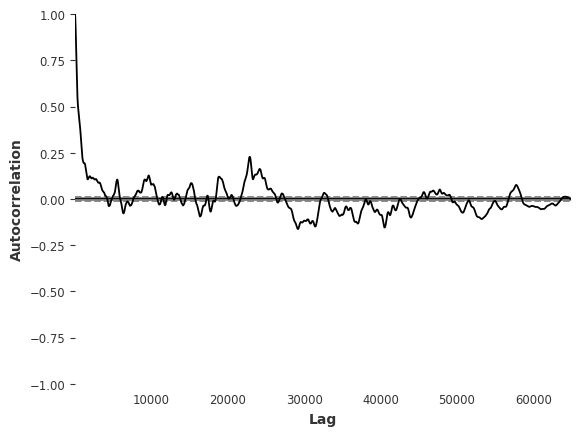

In [ ]:
from pandas.plotting import autocorrelation_plot

print('Auto-correlación:', df_smoothed['Bicycles'].autocorr())

autocorrelation_plot(df_smoothed.set_index('Date'))

####Fourier Analysis

In [ ]:
df_test.head()

,Date,Bicycles
83557,2015-06-01 00:00:00,11.333333
83558,2015-06-01 00:15:00,11.375000
83559,2015-06-01 00:30:00,11.416667
83560,2015-06-01 00:45:00,11.458333
83561,2015-06-01 01:00:00,11.500000


Text(0, 0.5, 'PSD')

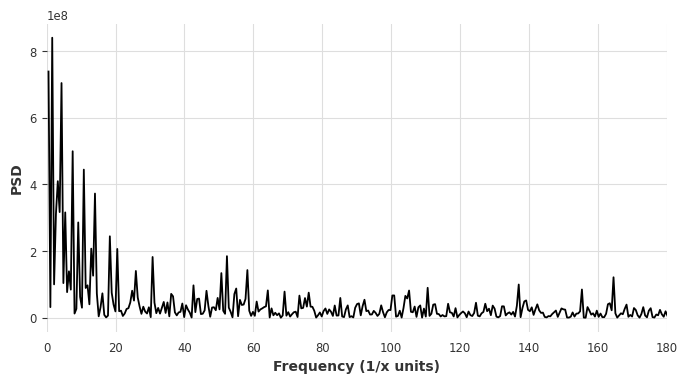

In [ ]:
import scipy as sp
import scipy.fftpack
import matplotlib.pyplot as plt

df_test['Bicycles'] = df_test['Bicycles'].astype(int)

temp_fft = sp.fftpack.fft(df_test['Bicycles'])
temp_psd = np.abs(temp_fft) ** 2

# Periodos de 15 minutos en un año
freq_unit = 1/35040

fftfreq = sp.fftpack.fftfreq(len(temp_psd), freq_unit)

i = fftfreq > 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], temp_psd[i])
ax.set_xlim(0, 180)
ax.set_xlabel('Frequency (1/x units)')
ax.set_ylabel('PSD')

###Normalization

####Log minus rolling mean

<Axes: xlabel='Date'>

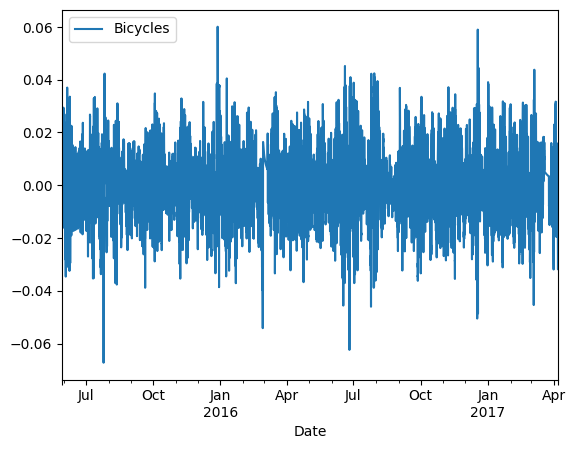

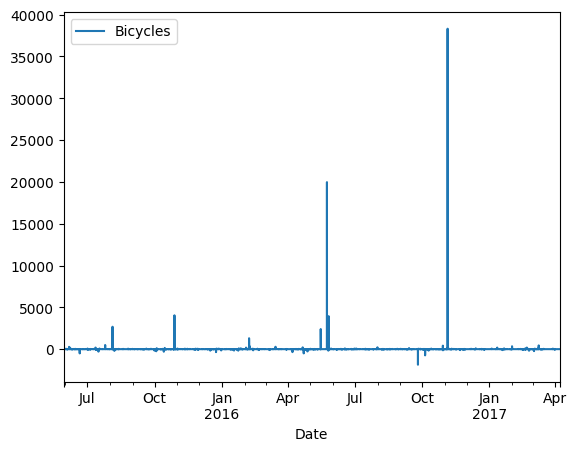

In [ ]:
df_log = np.log(df_smoothed.set_index('Date'))

rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

df_log_minus_mean.plot()
df_log_minus_mean.pct_change(fill_method='ffill').plot()

####Exponential Smoothing

<Axes: xlabel='Date'>

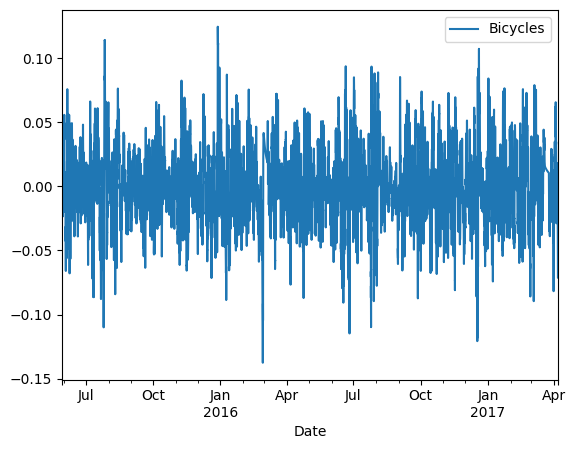

In [ ]:
df_log = np.log(df_smoothed.set_index('Date'))
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
df_log_exp_decay.plot()

####Diferentiation

<Axes: xlabel='Date'>

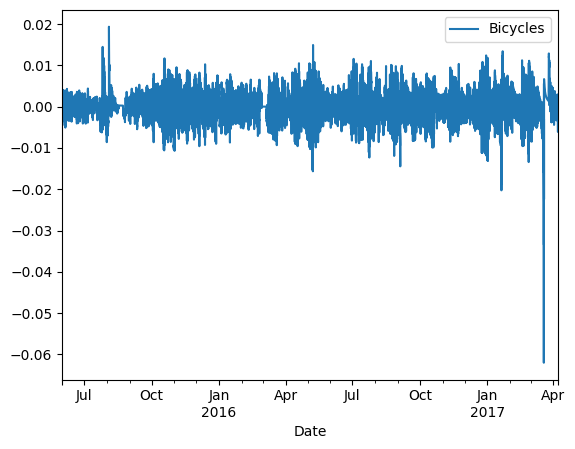

In [ ]:
df_log_shift = df_log.diff()
df_log_shift.dropna(inplace=True)

df_log_shift.plot()

##Time Serie Forecast (Blue Print)

In [ ]:
df = df_smoothed.set_index('Date') #Renaming

###TimeSeries Cross Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits=25, test_size=4*24*7) # 1 week
df = df.sort_index()

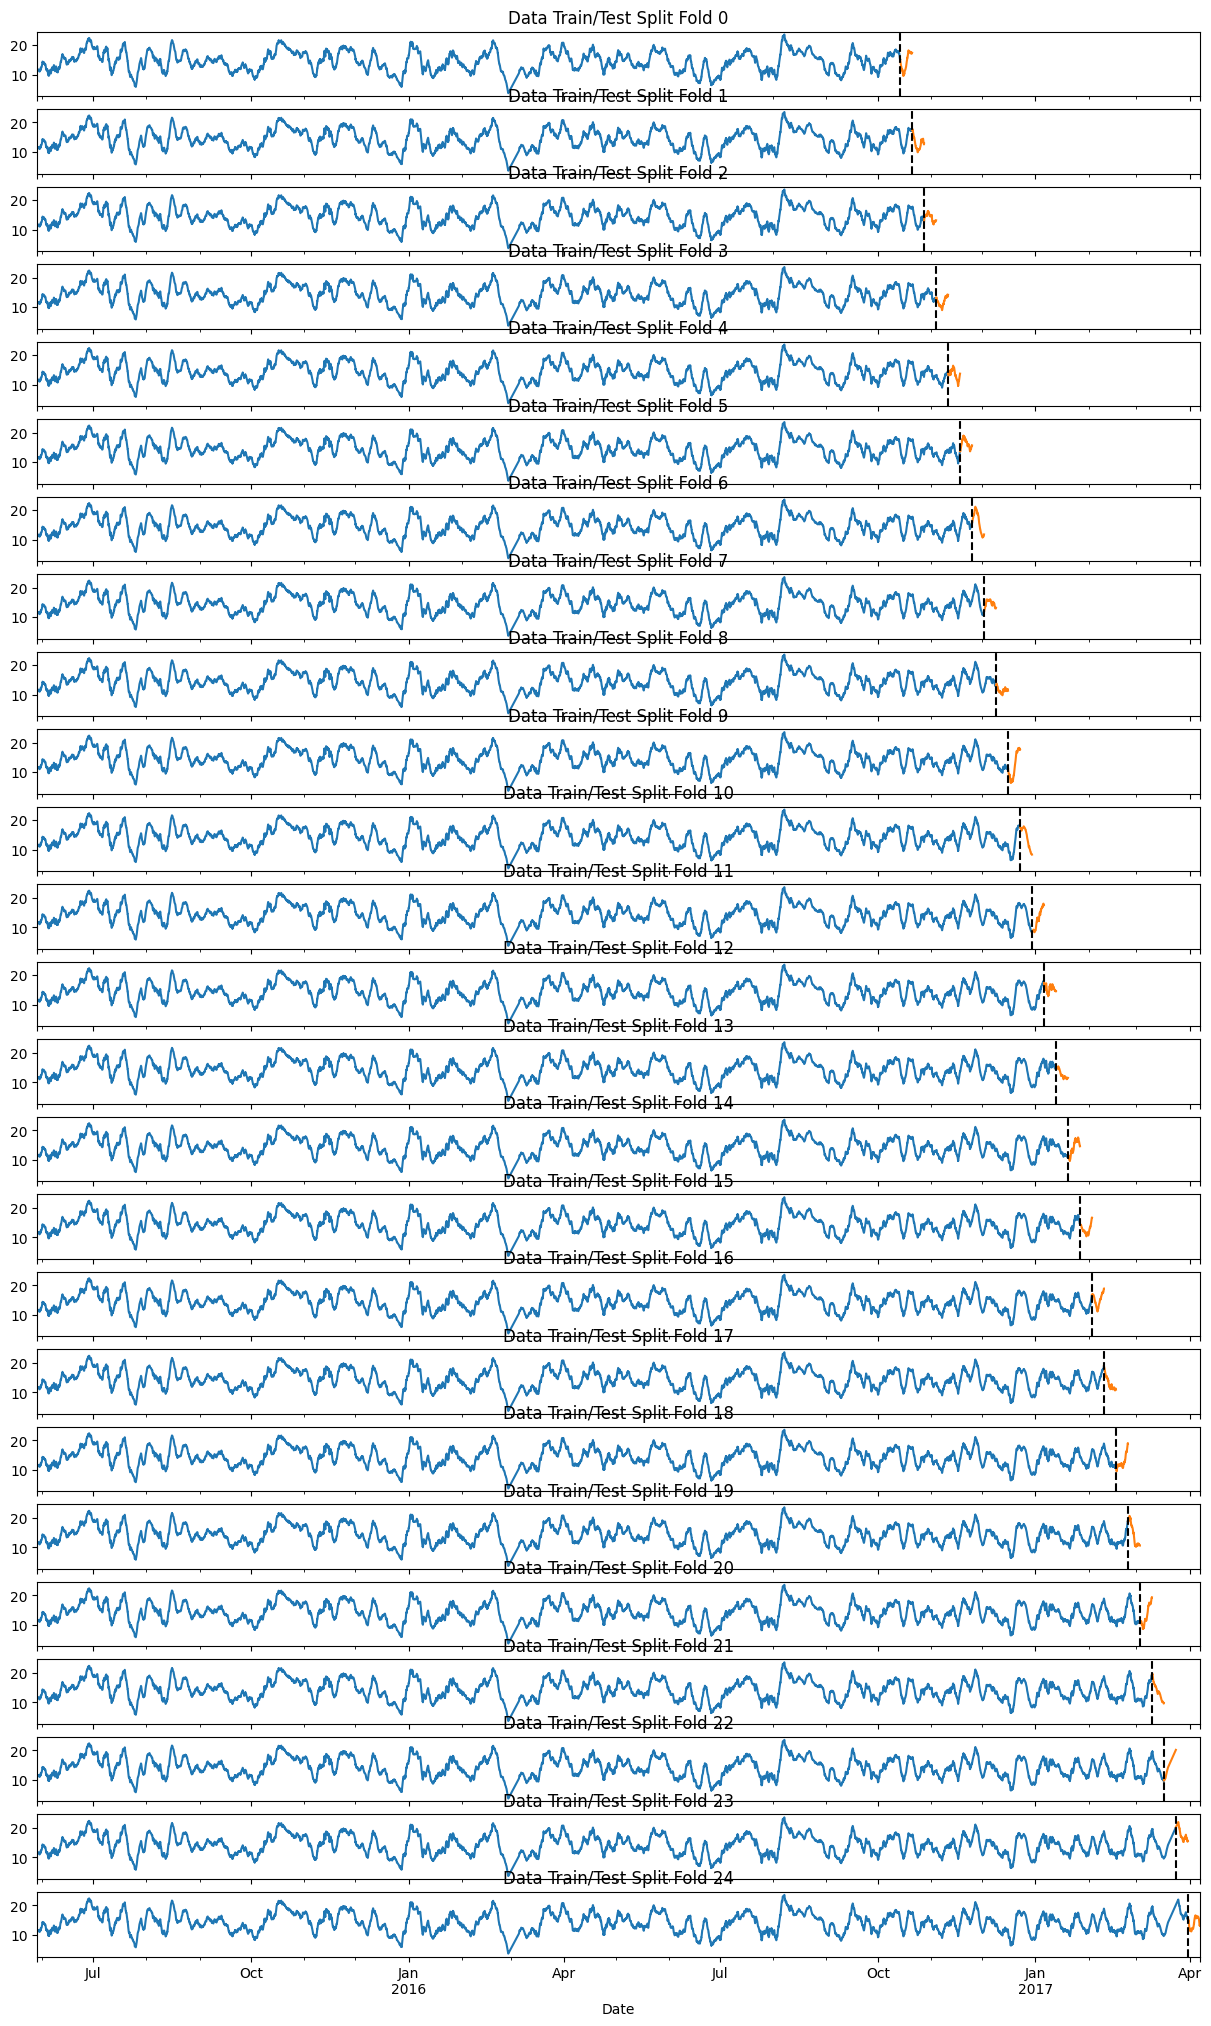

In [ ]:
fig, axs = plt.subplots(25, 1, figsize=(15,25),
                            sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  train['Bicycles'].plot(ax=axs[fold],
                         label='Training Set',
                         title=f'Data Train/Test Split Fold {fold}')
  test['Bicycles'].plot(ax=axs[fold],
                         label='Test Set')
  axs[fold].axvline(test.index.min(), color='black', ls='--')
  fold+=1
plt.show()

###Forecasting Horizon

In [ ]:
def create_features(df):
  df = df.copy()
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['dayofmonth'] = df.index.day
  df['weekofyear'] = df.index.isocalendar().week
  return df

In [ ]:
df = create_features(df)

### Lag Features

In [ ]:
def add_lags(df):
  df = df.copy()
  target_map = df['Bicycles'].to_dict()
  df['lag1'] = (df.index - pd.Timedelta('7 days')).map(target_map)
  df['lag2'] = (df.index - pd.Timedelta('14 days')).map(target_map)
  df['lag3'] = (df.index - pd.Timedelta('21 days')).map(target_map)
  return df

In [ ]:
df = add_lags(df)

###Train Using Cross Validation

In [ ]:
tss = TimeSeriesSplit(n_splits=25, test_size=4*24*7)
df = df.sort_index()

preds = []
scores = []
for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]

  train = create_features(train)
  test = create_features(test)

  FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
              'lag1', 'lag2', 'lag3']
  TARGET = 'Bicycles'

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                         n_estimators=10000,
                         objective='reg:squarederror',
                         max_depth=3,
                         learning_rate=0.001)

  reg.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=1000)

  y_pred = reg.predict(X_test)
  preds.append(y_pred)
  score = np.sqrt(mean_squared_error(y_test, y_pred))
  scores.append(score)

[0]	validation_0-rmse:14.22846	validation_1-rmse:13.95082
[1000]	validation_0-rmse:5.92779	validation_1-rmse:4.62061
[2000]	validation_0-rmse:3.42165	validation_1-rmse:2.91498
[3000]	validation_0-rmse:2.79670	validation_1-rmse:3.38621
[4000]	validation_0-rmse:2.56216	validation_1-rmse:3.75800
[5000]	validation_0-rmse:2.42718	validation_1-rmse:3.95118
[6000]	validation_0-rmse:2.30107	validation_1-rmse:4.05127
[7000]	validation_0-rmse:2.19292	validation_1-rmse:4.07469
[8000]	validation_0-rmse:2.08455	validation_1-rmse:4.15892
[9000]	validation_0-rmse:1.97462	validation_1-rmse:4.28540
[9999]	validation_0-rmse:1.89241	validation_1-rmse:4.42948
[0]	validation_0-rmse:14.22473	validation_1-rmse:12.64810
[1000]	validation_0-rmse:5.93684	validation_1-rmse:3.50254
[2000]	validation_0-rmse:3.44056	validation_1-rmse:2.08753
[3000]	validation_0-rmse:2.82077	validation_1-rmse:2.69666
[4000]	validation_0-rmse:2.61327	validation_1-rmse:3.04712
[5000]	validation_0-rmse:2.48616	validation_1-rmse:3.21368

In [ ]:
scores

[4.429484193042419,
 3.6983817203479914,
 1.1266993723039944,
 3.9566492129577338,
 1.6647423655366504,
 2.3715994135854683,
 2.7710922160467395,
 2.5187538770484403,
 2.841476048097265,
 5.493561014997908,
 4.534970499994659,
 3.52186762417294,
 2.572827893362705,
 1.4881445118054628,
 2.2901252557342238,
 2.564711486216387,
 2.676980621538518,
 4.128358790131314,
 4.294325794761479,
 5.2006084828002646,
 3.831407626108015,
 2.254380158732697,
 1.2876010239490705,
 2.362238537780286,
 2.338933693864788]

###Predicting the Future

In [ ]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'Bicycles'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=25000,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.001)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=1000)

[0]	validation_0-rmse:14.10289
[1000]	validation_0-rmse:5.88638
[2000]	validation_0-rmse:3.44043
[3000]	validation_0-rmse:2.83888
[4000]	validation_0-rmse:2.54204
[5000]	validation_0-rmse:2.36994
[6000]	validation_0-rmse:2.23816
[7000]	validation_0-rmse:2.14851
[8000]	validation_0-rmse:2.06159
[9000]	validation_0-rmse:1.99162
[10000]	validation_0-rmse:1.93220
[11000]	validation_0-rmse:1.87823
[12000]	validation_0-rmse:1.82813
[13000]	validation_0-rmse:1.78780
[14000]	validation_0-rmse:1.74950
[15000]	validation_0-rmse:1.71590
[16000]	validation_0-rmse:1.68319
[17000]	validation_0-rmse:1.65261
[18000]	validation_0-rmse:1.62450
[19000]	validation_0-rmse:1.59507
[20000]	validation_0-rmse:1.57204
[21000]	validation_0-rmse:1.54766
[22000]	validation_0-rmse:1.52668
[23000]	validation_0-rmse:1.50511
[24000]	validation_0-rmse:1.48517
[24999]	validation_0-rmse:1.46834


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
df.index.max()

Timestamp('2017-04-06 23:45:00')

In [ ]:
future = pd.date_range('2017-02-08 08:00:00', '2017-02-09 08:00:00', freq='15T')
future_df = pd.DataFrame(index = future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [ ]:
future_w_features = df_and_future.query('isFuture').copy()

In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

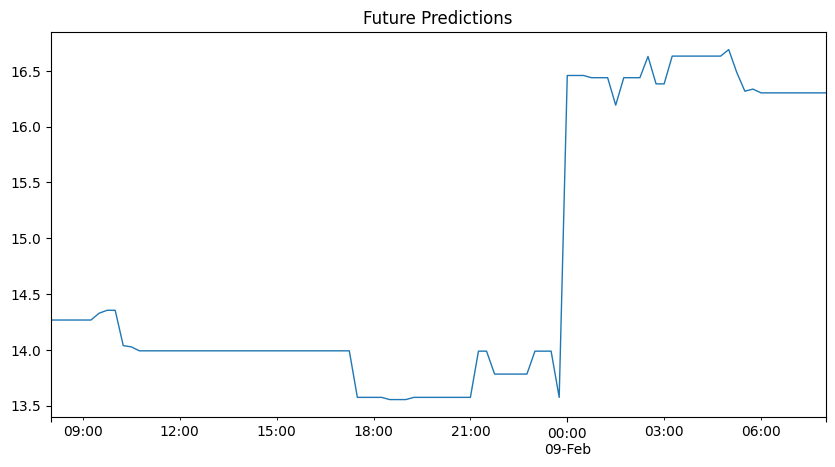

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

###Save de model

In [ ]:
# Save model
reg.save_model('model.json')

In [ ]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('model.json')
future_w_features['pred'] = reg_new.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1, lw=1,
                               title='Future Predictions')

##Feature Importance

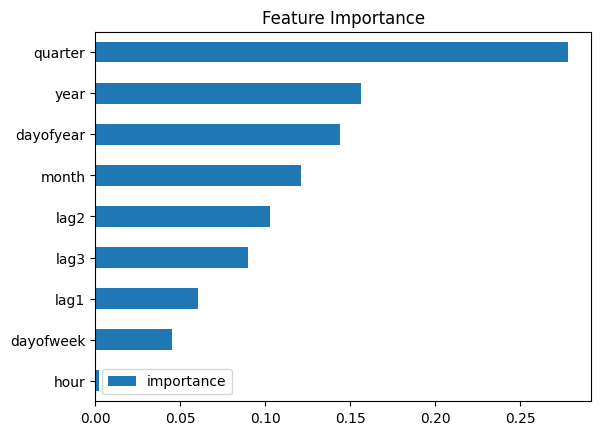

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

###Predicting the known

In [ ]:
df = create_features(df)
df = add_lags(df)

In [ ]:
test = create_features(test)
test = add_lags(test)

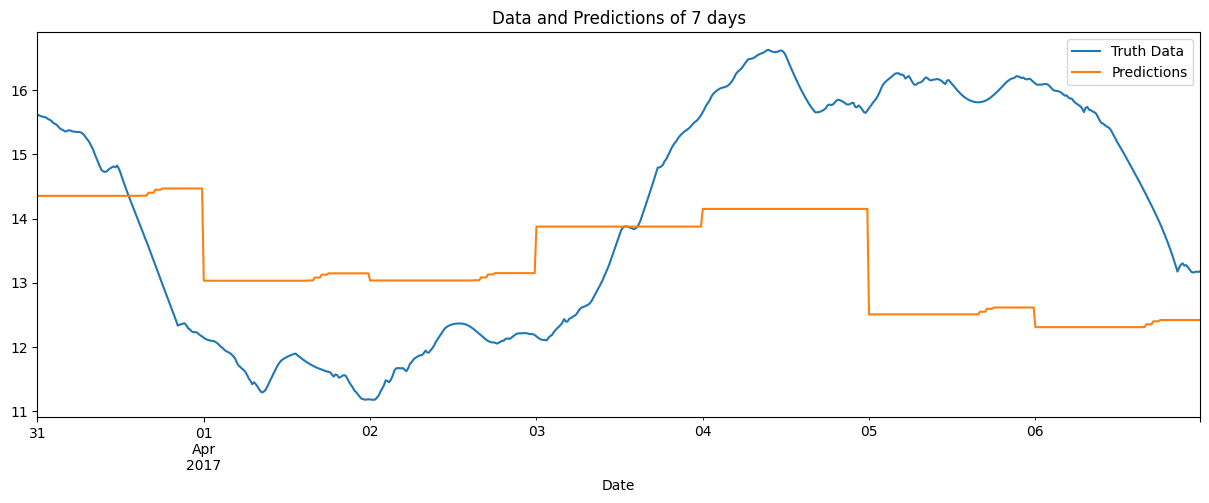

In [ ]:
test['pred'] = reg.predict(test[FEATURES])
ax = test[['Bicycles']].plot(figsize=(15, 5))
test['pred'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Data and Predictions of 7 days')
plt.show()

#Data Enhancement - **Future Work**

<font color=red> Al final no nos dio tiempo de mejorar los datos pero lo dejamos como idea para mejorar los resultados del modelo

The idea is to add some information to dataset like the weather at day level, for example add a colum with day weather "sunny", "windy", "rainy", ... Another relevant information to add is, p.e. holidays.

In [ ]:
df = df_log_exp_decay #Renaming

###TimeSeries Cross Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits=20, test_size=4*24*7, gap=4*24) # We want to predict 1 week forward
df = df.sort_index()

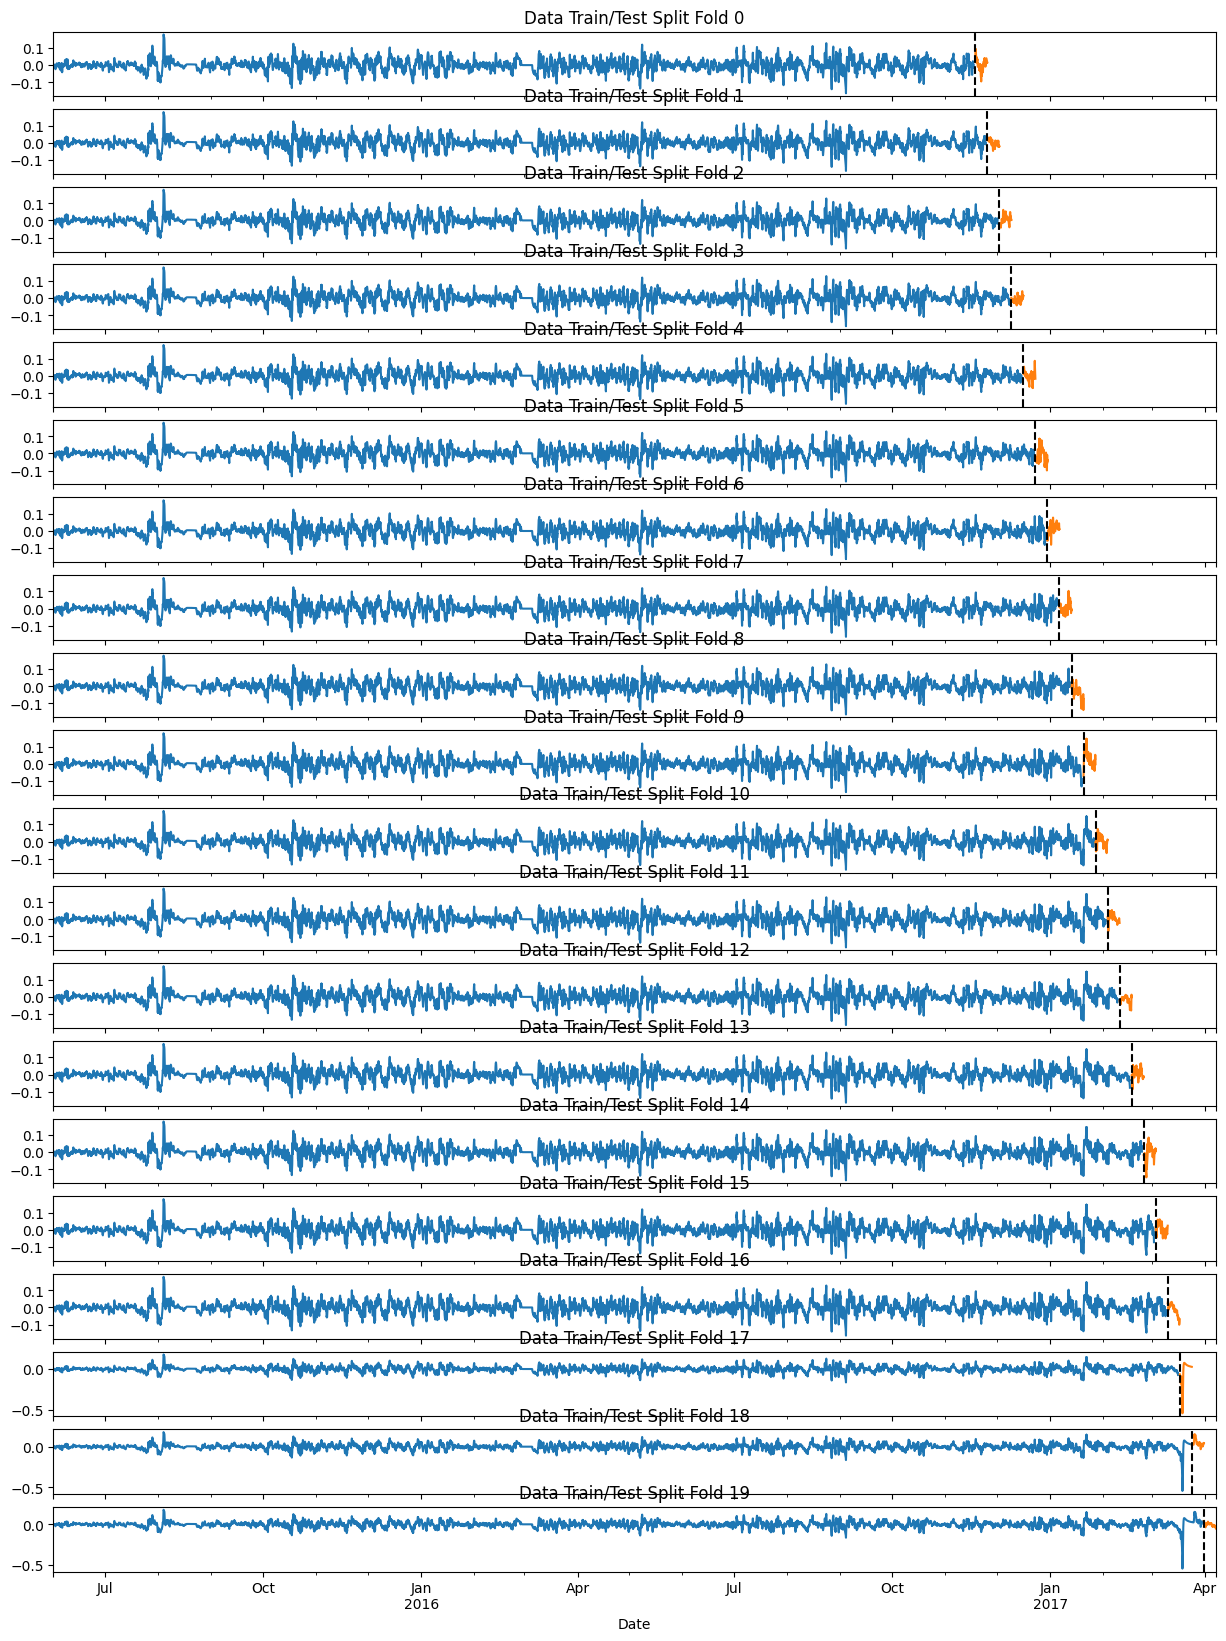

In [ ]:
#fig, axs = plt.subplots(20, 1, figsize=(15,20),
#                             sharex=True)

#fold = 0
for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  #train['Bicycles'].plot(ax=axs[fold],
  #                       label='Training Set',
  #                       title=f'Data Train/Test Split Fold {fold}')
  #test['Bicycles'].plot(ax=axs[fold],
  #                       label='Test Set')
  #axs[fold].axvline(test.index.min(), color='black', ls='--')
  #fold+=1
#plt.show()

###Forecasting Horizon

In [ ]:
def create_features(df):
  df = df.copy()
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['dayofmonth'] = df.index.day
  df['weekofyear'] = df.index.isocalendar().week
  return df

In [ ]:
df = create_features(df)

### Lag Features

In [ ]:
def add_lags(df):
  df = df.copy()
  target_map = df['Bicycles'].to_dict()
  df['lag1'] = (df.index - pd.Timedelta('7 days')).map(target_map)
  df['lag2'] = (df.index - pd.Timedelta('14 days')).map(target_map)
  df['lag3'] = (df.index - pd.Timedelta('21 days')).map(target_map)
  return df

In [ ]:
df = add_lags(df)

###Train Using Cross Validation

In [ ]:
tss = TimeSeriesSplit(n_splits=20, test_size=4*24*7, gap=4*24) # We want to predict 1 week forward
df = df.sort_index()

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]

  train = create_features(train)
  test = create_features(test)

  FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
              'lag1', 'lag2', 'lag3']
  TARGET = 'Bicycles'

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                         n_estimators=1000,
                         early_stopping_round=50,
                         objective='reg:linear',
                         max_depth=3,
                         learning_rate=0.1)

  reg.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100)

  y_pred = reg.predict(X_test)
  preds.append(y_pred)
  score = np.sqrt(mean_squared_error(y_test, y_pred))
  scores.append(score)

[0]	validation_0-rmse:0.45144	validation_1-rmse:0.44680


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02797	validation_1-rmse:0.04266
[200]	validation_0-rmse:0.02575	validation_1-rmse:0.04594
[300]	validation_0-rmse:0.02419	validation_1-rmse:0.04597
[400]	validation_0-rmse:0.02306	validation_1-rmse:0.04763
[500]	validation_0-rmse:0.02210	validation_1-rmse:0.04768
[600]	validation_0-rmse:0.02124	validation_1-rmse:0.04838
[700]	validation_0-rmse:0.02046	validation_1-rmse:0.04851
[800]	validation_0-rmse:0.01987	validation_1-rmse:0.04887
[900]	validation_0-rmse:0.01932	validation_1-rmse:0.04907
[999]	validation_0-rmse:0.01887	validation_1-rmse:0.04918
[0]	validation_0-rmse:0.45144	validation_1-rmse:0.45233


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02809	validation_1-rmse:0.02215
[200]	validation_0-rmse:0.02588	validation_1-rmse:0.02436
[300]	validation_0-rmse:0.02451	validation_1-rmse:0.02602
[400]	validation_0-rmse:0.02325	validation_1-rmse:0.02803
[500]	validation_0-rmse:0.02232	validation_1-rmse:0.03120
[600]	validation_0-rmse:0.02151	validation_1-rmse:0.03209
[700]	validation_0-rmse:0.02086	validation_1-rmse:0.03275
[800]	validation_0-rmse:0.02022	validation_1-rmse:0.03432
[900]	validation_0-rmse:0.01968	validation_1-rmse:0.03434
[999]	validation_0-rmse:0.01919	validation_1-rmse:0.03457
[0]	validation_0-rmse:0.45140	validation_1-rmse:0.44292


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02831	validation_1-rmse:0.02901
[200]	validation_0-rmse:0.02616	validation_1-rmse:0.03000
[300]	validation_0-rmse:0.02445	validation_1-rmse:0.03191
[400]	validation_0-rmse:0.02328	validation_1-rmse:0.03397
[500]	validation_0-rmse:0.02242	validation_1-rmse:0.03408
[600]	validation_0-rmse:0.02159	validation_1-rmse:0.03480
[700]	validation_0-rmse:0.02090	validation_1-rmse:0.03539
[800]	validation_0-rmse:0.02031	validation_1-rmse:0.03588
[900]	validation_0-rmse:0.01978	validation_1-rmse:0.03588
[999]	validation_0-rmse:0.01917	validation_1-rmse:0.03600
[0]	validation_0-rmse:0.45135	validation_1-rmse:0.46043


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:12:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02794	validation_1-rmse:0.02735
[200]	validation_0-rmse:0.02580	validation_1-rmse:0.02942
[300]	validation_0-rmse:0.02432	validation_1-rmse:0.03090
[400]	validation_0-rmse:0.02324	validation_1-rmse:0.03122
[500]	validation_0-rmse:0.02227	validation_1-rmse:0.03112
[600]	validation_0-rmse:0.02142	validation_1-rmse:0.03055
[700]	validation_0-rmse:0.02067	validation_1-rmse:0.03012
[800]	validation_0-rmse:0.02008	validation_1-rmse:0.03002
[900]	validation_0-rmse:0.01952	validation_1-rmse:0.02969
[999]	validation_0-rmse:0.01904	validation_1-rmse:0.02956
[0]	validation_0-rmse:0.45144	validation_1-rmse:0.44967


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02800	validation_1-rmse:0.03107
[200]	validation_0-rmse:0.02582	validation_1-rmse:0.03257
[300]	validation_0-rmse:0.02431	validation_1-rmse:0.03300
[400]	validation_0-rmse:0.02325	validation_1-rmse:0.03318
[500]	validation_0-rmse:0.02215	validation_1-rmse:0.03357
[600]	validation_0-rmse:0.02140	validation_1-rmse:0.03360
[700]	validation_0-rmse:0.02078	validation_1-rmse:0.03393
[800]	validation_0-rmse:0.02014	validation_1-rmse:0.03400
[900]	validation_0-rmse:0.01959	validation_1-rmse:0.03431
[999]	validation_0-rmse:0.01909	validation_1-rmse:0.03447
[0]	validation_0-rmse:0.45142	validation_1-rmse:0.46260


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02823	validation_1-rmse:0.05062
[200]	validation_0-rmse:0.02612	validation_1-rmse:0.04989
[300]	validation_0-rmse:0.02455	validation_1-rmse:0.04952
[400]	validation_0-rmse:0.02350	validation_1-rmse:0.05017
[500]	validation_0-rmse:0.02260	validation_1-rmse:0.05026
[600]	validation_0-rmse:0.02187	validation_1-rmse:0.04992
[700]	validation_0-rmse:0.02127	validation_1-rmse:0.05013
[800]	validation_0-rmse:0.02065	validation_1-rmse:0.05037
[900]	validation_0-rmse:0.02015	validation_1-rmse:0.05020
[999]	validation_0-rmse:0.01969	validation_1-rmse:0.05076
[0]	validation_0-rmse:0.45147	validation_1-rmse:0.43624


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02807	validation_1-rmse:0.03382
[200]	validation_0-rmse:0.02605	validation_1-rmse:0.03590
[300]	validation_0-rmse:0.02445	validation_1-rmse:0.03619
[400]	validation_0-rmse:0.02333	validation_1-rmse:0.03741
[500]	validation_0-rmse:0.02231	validation_1-rmse:0.03674
[600]	validation_0-rmse:0.02151	validation_1-rmse:0.03710
[700]	validation_0-rmse:0.02088	validation_1-rmse:0.03749
[800]	validation_0-rmse:0.02025	validation_1-rmse:0.03819
[900]	validation_0-rmse:0.01970	validation_1-rmse:0.03790
[999]	validation_0-rmse:0.01919	validation_1-rmse:0.03747
[0]	validation_0-rmse:0.45138	validation_1-rmse:0.44877


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02819	validation_1-rmse:0.03045
[200]	validation_0-rmse:0.02605	validation_1-rmse:0.02993
[300]	validation_0-rmse:0.02475	validation_1-rmse:0.02949
[400]	validation_0-rmse:0.02356	validation_1-rmse:0.02991
[500]	validation_0-rmse:0.02257	validation_1-rmse:0.03053
[600]	validation_0-rmse:0.02169	validation_1-rmse:0.03007
[700]	validation_0-rmse:0.02100	validation_1-rmse:0.03071
[800]	validation_0-rmse:0.02036	validation_1-rmse:0.03077
[900]	validation_0-rmse:0.01985	validation_1-rmse:0.03153
[999]	validation_0-rmse:0.01942	validation_1-rmse:0.03157
[0]	validation_0-rmse:0.45135	validation_1-rmse:0.48398


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02814	validation_1-rmse:0.05488
[200]	validation_0-rmse:0.02606	validation_1-rmse:0.05778
[300]	validation_0-rmse:0.02468	validation_1-rmse:0.05799
[400]	validation_0-rmse:0.02342	validation_1-rmse:0.05847
[500]	validation_0-rmse:0.02256	validation_1-rmse:0.05886
[600]	validation_0-rmse:0.02181	validation_1-rmse:0.05780
[700]	validation_0-rmse:0.02117	validation_1-rmse:0.05814
[800]	validation_0-rmse:0.02055	validation_1-rmse:0.05815
[900]	validation_0-rmse:0.02001	validation_1-rmse:0.05735
[999]	validation_0-rmse:0.01953	validation_1-rmse:0.05779
[0]	validation_0-rmse:0.45155	validation_1-rmse:0.42285


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02877	validation_1-rmse:0.07608
[200]	validation_0-rmse:0.02692	validation_1-rmse:0.09182
[300]	validation_0-rmse:0.02534	validation_1-rmse:0.10475
[400]	validation_0-rmse:0.02414	validation_1-rmse:0.11059
[500]	validation_0-rmse:0.02311	validation_1-rmse:0.11570
[600]	validation_0-rmse:0.02229	validation_1-rmse:0.11722
[700]	validation_0-rmse:0.02160	validation_1-rmse:0.11859
[800]	validation_0-rmse:0.02093	validation_1-rmse:0.11838
[900]	validation_0-rmse:0.02043	validation_1-rmse:0.11842
[999]	validation_0-rmse:0.01990	validation_1-rmse:0.11857
[0]	validation_0-rmse:0.45138	validation_1-rmse:0.44604


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02884	validation_1-rmse:0.03127
[200]	validation_0-rmse:0.02685	validation_1-rmse:0.03439
[300]	validation_0-rmse:0.02526	validation_1-rmse:0.03483
[400]	validation_0-rmse:0.02408	validation_1-rmse:0.03701
[500]	validation_0-rmse:0.02326	validation_1-rmse:0.03841
[600]	validation_0-rmse:0.02245	validation_1-rmse:0.03796
[700]	validation_0-rmse:0.02179	validation_1-rmse:0.03790
[800]	validation_0-rmse:0.02119	validation_1-rmse:0.03780
[900]	validation_0-rmse:0.02067	validation_1-rmse:0.03673
[999]	validation_0-rmse:0.02012	validation_1-rmse:0.03640
[0]	validation_0-rmse:0.45129	validation_1-rmse:0.44475


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02886	validation_1-rmse:0.02334
[200]	validation_0-rmse:0.02691	validation_1-rmse:0.02657
[300]	validation_0-rmse:0.02551	validation_1-rmse:0.02635
[400]	validation_0-rmse:0.02436	validation_1-rmse:0.02687
[500]	validation_0-rmse:0.02348	validation_1-rmse:0.02820
[600]	validation_0-rmse:0.02267	validation_1-rmse:0.02766
[700]	validation_0-rmse:0.02194	validation_1-rmse:0.02823
[800]	validation_0-rmse:0.02128	validation_1-rmse:0.02865
[900]	validation_0-rmse:0.02070	validation_1-rmse:0.02870
[999]	validation_0-rmse:0.02026	validation_1-rmse:0.02872
[0]	validation_0-rmse:0.45125	validation_1-rmse:0.47076


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02866	validation_1-rmse:0.03194
[200]	validation_0-rmse:0.02648	validation_1-rmse:0.03241
[300]	validation_0-rmse:0.02498	validation_1-rmse:0.03257
[400]	validation_0-rmse:0.02389	validation_1-rmse:0.03266
[500]	validation_0-rmse:0.02302	validation_1-rmse:0.03283
[600]	validation_0-rmse:0.02220	validation_1-rmse:0.03251
[700]	validation_0-rmse:0.02164	validation_1-rmse:0.03235
[800]	validation_0-rmse:0.02109	validation_1-rmse:0.03212
[900]	validation_0-rmse:0.02047	validation_1-rmse:0.03303
[999]	validation_0-rmse:0.01999	validation_1-rmse:0.03294
[0]	validation_0-rmse:0.45138	validation_1-rmse:0.44082


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:13:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02870	validation_1-rmse:0.03318
[200]	validation_0-rmse:0.02648	validation_1-rmse:0.03387
[300]	validation_0-rmse:0.02514	validation_1-rmse:0.03991
[400]	validation_0-rmse:0.02405	validation_1-rmse:0.03958
[500]	validation_0-rmse:0.02307	validation_1-rmse:0.03865
[600]	validation_0-rmse:0.02225	validation_1-rmse:0.04353
[700]	validation_0-rmse:0.02151	validation_1-rmse:0.04523
[800]	validation_0-rmse:0.02093	validation_1-rmse:0.04507
[900]	validation_0-rmse:0.02041	validation_1-rmse:0.04518
[999]	validation_0-rmse:0.01998	validation_1-rmse:0.04525
[0]	validation_0-rmse:0.45134	validation_1-rmse:0.45840


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02905	validation_1-rmse:0.05251
[200]	validation_0-rmse:0.02691	validation_1-rmse:0.05757
[300]	validation_0-rmse:0.02560	validation_1-rmse:0.05734
[400]	validation_0-rmse:0.02459	validation_1-rmse:0.05777
[500]	validation_0-rmse:0.02356	validation_1-rmse:0.05836
[600]	validation_0-rmse:0.02276	validation_1-rmse:0.05932
[700]	validation_0-rmse:0.02205	validation_1-rmse:0.05966
[800]	validation_0-rmse:0.02152	validation_1-rmse:0.05936
[900]	validation_0-rmse:0.02099	validation_1-rmse:0.06035
[999]	validation_0-rmse:0.02051	validation_1-rmse:0.06047
[0]	validation_0-rmse:0.45142	validation_1-rmse:0.44424


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02893	validation_1-rmse:0.03542
[200]	validation_0-rmse:0.02692	validation_1-rmse:0.03674
[300]	validation_0-rmse:0.02552	validation_1-rmse:0.03997
[400]	validation_0-rmse:0.02440	validation_1-rmse:0.04162
[500]	validation_0-rmse:0.02348	validation_1-rmse:0.04260
[600]	validation_0-rmse:0.02272	validation_1-rmse:0.04415
[700]	validation_0-rmse:0.02199	validation_1-rmse:0.04626
[800]	validation_0-rmse:0.02152	validation_1-rmse:0.04687
[900]	validation_0-rmse:0.02097	validation_1-rmse:0.04746
[999]	validation_0-rmse:0.02051	validation_1-rmse:0.04965
[0]	validation_0-rmse:0.45135	validation_1-rmse:0.46375


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:13] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02898	validation_1-rmse:0.03561
[200]	validation_0-rmse:0.02699	validation_1-rmse:0.03344
[300]	validation_0-rmse:0.02555	validation_1-rmse:0.03217
[400]	validation_0-rmse:0.02428	validation_1-rmse:0.03277
[500]	validation_0-rmse:0.02333	validation_1-rmse:0.03306
[600]	validation_0-rmse:0.02262	validation_1-rmse:0.03315
[700]	validation_0-rmse:0.02193	validation_1-rmse:0.03294
[800]	validation_0-rmse:0.02136	validation_1-rmse:0.03324
[900]	validation_0-rmse:0.02083	validation_1-rmse:0.03366
[999]	validation_0-rmse:0.02030	validation_1-rmse:0.03547
[0]	validation_0-rmse:0.45137	validation_1-rmse:0.49531


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02928	validation_1-rmse:0.13652
[200]	validation_0-rmse:0.02727	validation_1-rmse:0.13601
[300]	validation_0-rmse:0.02589	validation_1-rmse:0.13574
[400]	validation_0-rmse:0.02488	validation_1-rmse:0.13433
[500]	validation_0-rmse:0.02398	validation_1-rmse:0.13473
[600]	validation_0-rmse:0.02330	validation_1-rmse:0.13505
[700]	validation_0-rmse:0.02255	validation_1-rmse:0.13480
[800]	validation_0-rmse:0.02197	validation_1-rmse:0.13481
[900]	validation_0-rmse:0.02139	validation_1-rmse:0.13519
[999]	validation_0-rmse:0.02089	validation_1-rmse:0.13571
[0]	validation_0-rmse:0.45196	validation_1-rmse:0.40951


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.03015	validation_1-rmse:0.05041
[200]	validation_0-rmse:0.02773	validation_1-rmse:0.04828
[300]	validation_0-rmse:0.02621	validation_1-rmse:0.04594
[400]	validation_0-rmse:0.02500	validation_1-rmse:0.04548
[500]	validation_0-rmse:0.02406	validation_1-rmse:0.04528
[600]	validation_0-rmse:0.02333	validation_1-rmse:0.04391
[700]	validation_0-rmse:0.02268	validation_1-rmse:0.04354
[800]	validation_0-rmse:0.02207	validation_1-rmse:0.04412
[900]	validation_0-rmse:0.02154	validation_1-rmse:0.04387
[999]	validation_0-rmse:0.02106	validation_1-rmse:0.04336
[0]	validation_0-rmse:0.45157	validation_1-rmse:0.45414


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.02999	validation_1-rmse:0.03499
[200]	validation_0-rmse:0.02789	validation_1-rmse:0.03912
[300]	validation_0-rmse:0.02653	validation_1-rmse:0.04154
[400]	validation_0-rmse:0.02533	validation_1-rmse:0.04366
[500]	validation_0-rmse:0.02425	validation_1-rmse:0.04433
[600]	validation_0-rmse:0.02344	validation_1-rmse:0.04426
[700]	validation_0-rmse:0.02279	validation_1-rmse:0.04441
[800]	validation_0-rmse:0.02224	validation_1-rmse:0.04680
[900]	validation_0-rmse:0.02169	validation_1-rmse:0.04800
[999]	validation_0-rmse:0.02116	validation_1-rmse:0.04909


In [ ]:
scores

[0.049180172229407355,
 0.03457368108486325,
 0.03599948759103149,
 0.029564716721121386,
 0.03446572628900847,
 0.05075877804087812,
 0.03747091005259315,
 0.03156746428197545,
 0.05778829138318817,
 0.11856538500656219,
 0.03640019836127006,
 0.028716321863094852,
 0.03293589810998071,
 0.045250418785840116,
 0.060474523382326284,
 0.04965305032245007,
 0.035467381229639786,
 0.13571324269950719,
 0.043360403212716926,
 0.049085166527606146]

###Predicting the Future

In [ ]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'Bicycles'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:0.49646


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:19:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.18456
[200]	validation_0-rmse:0.07453
[300]	validation_0-rmse:0.04130
[400]	validation_0-rmse:0.03400
[500]	validation_0-rmse:0.03251
[600]	validation_0-rmse:0.03180
[700]	validation_0-rmse:0.03123
[800]	validation_0-rmse:0.03077
[900]	validation_0-rmse:0.03038
[999]	validation_0-rmse:0.03005


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
df.index.max()

Timestamp('2017-04-07 10:15:00')

In [ ]:
future = pd.date_range('2017-04-07 10:15:00', '2017-04-08 10:15:00', freq='15T')
future_df = pd.DataFrame(index = future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [ ]:
future_w_features = df_and_future.query('isFuture').copy()

In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

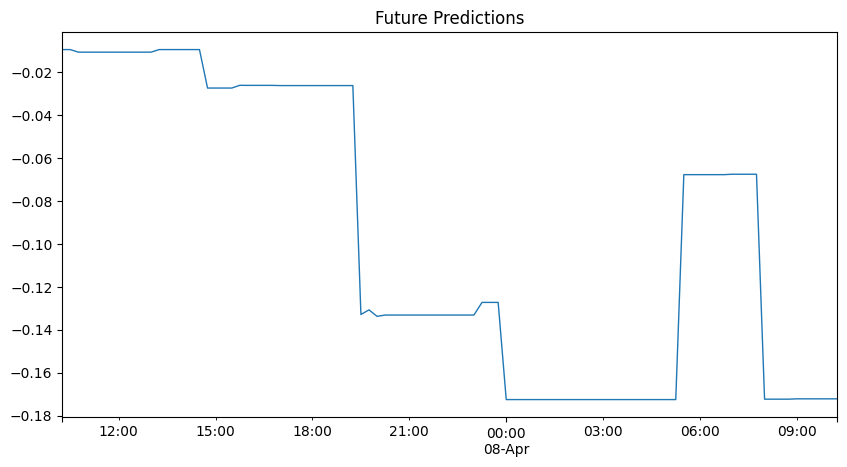

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

###Predicting the known

In [ ]:
df = create_features(df)
df = add_lags(df)

In [ ]:
init_prediction_date = df.index.max() - pd.Timedelta('100 days')
end_prediction_date = df.index.max() - pd.Timedelta('93 days')
test = df.loc[(df.index >= init_prediction_date) & (df.index <= end_prediction_date)]
test = create_features(test)
test = add_lags(test)

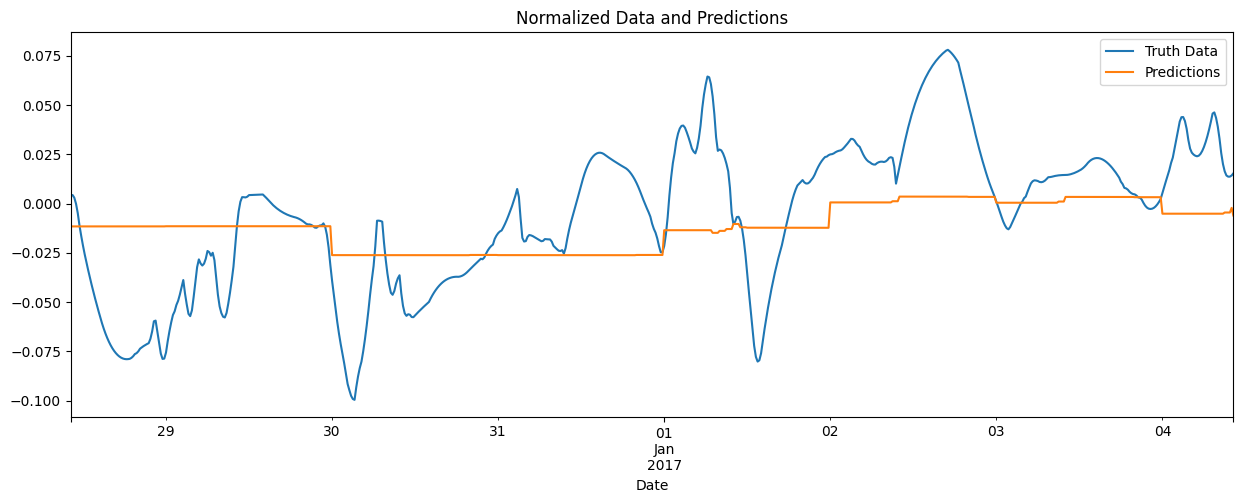

In [ ]:
test['pred'] = reg.predict(test[FEATURES]) # Predicting last 2 hours
ax = test[['Bicycles']].plot(figsize=(15, 5))
test['pred'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Normalized Data and Predictions')
plt.show()